<a href="https://colab.research.google.com/github/faan03/Detecting_Cryptojacking_On_Web_Sites_Use_Classifiers/blob/main/Detecting_Cryptojacking_On_Web_Sites_Use_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inicio (libs, load data)


## Pip install

In [ ]:
!pip install tensorflow-data-validation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 36.1 MB/s 
     |████████████████████████████████| 578.0 MB 18 kB/s 
     |████████████████████████████████| 99 kB 12.7 MB/s 
     |████████████████████████████████| 21.6 MB 1.3 MB/s 
     |████████████████████████████████| 294 kB 96.6 MB/s 
     |████████████████████████████████| 10.9 MB 62.0 MB/s 
     |████████████████████████████████| 62 kB 1.9 MB/s 
     |████████████████████████████████| 151 kB 58.9 MB/s 
     |████████████████████████████████| 270 kB 93.0 MB/s 
     |████████████████████████████████| 2.4 MB 69.4 MB/s 
     |████████████████████████████████| 47 kB 6.3 MB/s 
     |████████████████████████████████| 508 kB 104.2 MB/s 
     |████████████████████████████████| 180 kB 73.6 MB/s 
     |████████████████████████████████| 183 kB 76.6 MB/s 
     |████████████████████████████████| 267 kB 70.9 MB/s 
     |████████████████████████████

## Imports

In [ ]:
import numpy as np
import pickle
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
# tensorflow and keras
import tensorflow
from tensorflow import keras # for building Neural Networks
from keras.layers import Input
from keras.layers import Dense
from keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model
from matplotlib import pyplot
from tensorflow.keras.models import load_model
from keras.models import Sequential
from sklearn import tree
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# tensorflow validaiton
# import tensorflow_data_validation as tfdv

#imports algorithms
from xgboost import XGBClassifier
#imports scikit-learn
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score,roc_curve, auc, f1_score, precision_recall_curve, auc, log_loss
from sklearn.inspection import permutation_importance
from sklearn.cluster import KMeans


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

from numpy import mean
from numpy import std
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from numpy import mean
from numpy import std
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

In [ ]:
def plot_confusion_matrix(cm, class_names):
    """
    Returns a matplotlib figure containing the plotted confusion matrix.

    Args:
      cm (array, shape = [n, n]): a confusion matrix of integer classes
      class_names (array, shape = [n]): String names of the integer classes
    """
    figure = plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    # Compute the labels from the normalized confusion matrix.
    labels = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, labels[i, j], horizontalalignment="center", color=color)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return figure

## Load Data

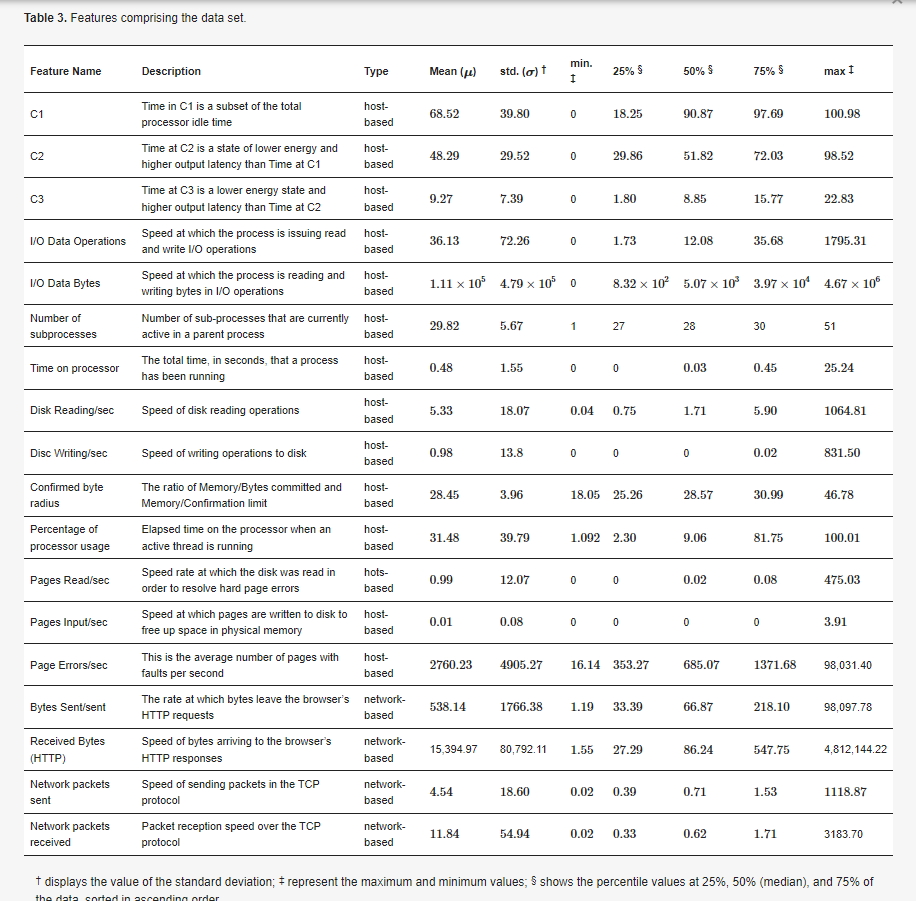

In [ ]:
import pandas as pd
urlData="https://www.dropbox.com/s/muj6dwzbvekkna6/dataset_MR_V5_ID.csv?dl=1"
dfData = pd.read_csv(urlData,sep=',') 
dfData
#dfData.describe()
clases=dfData["Label"].value_counts(sort=True)
clases

0    9292
1    3434
Name: Label, dtype: int64

In [ ]:
dfData

,C1,C2,C3,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Percentage of processor usage,Label
0,92.153928,87.838602,16.548061,32.709430,1.211241e+05,40.0,0.496719,6.088173,1.325547,549.250711,13018.949980,4.197994,10.542667,1.024380,0.006446,3111.005099,21.375443,7.849272,0
1,93.336042,42.460773,5.266382,15.070699,3.100975e+06,32.0,8.299424,19.871984,0.155597,34.498119,32.586497,0.489020,0.444563,0.288966,0.000000,6081.471589,21.131621,6.652355,0
2,98.695494,94.954179,7.650970,0.866827,8.539578e+02,29.0,0.000000,4.378587,0.000000,20.559356,26.093712,0.333395,0.355621,0.022226,0.000000,262.270699,21.060478,1.304476,0
3,97.723444,64.720701,6.079755,0.044444,1.653326e+01,27.0,0.000000,1.088884,0.000000,40.710932,24.666558,0.444442,0.333332,0.022222,0.000000,725.996801,20.978489,2.276608,0
4,98.710094,72.851579,9.299568,0.000000,0.000000e+00,27.0,0.000000,2.243506,0.000000,50.467775,24.656351,0.510897,0.333194,0.000000,0.000000,260.424379,20.942650,1.290458,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12721,96.964349,67.432618,1.704283,0.999986,1.279982e+02,27.0,0.000000,0.399994,0.000000,35.732828,21.088590,0.399994,0.266663,0.000000,0.000000,320.684351,32.404441,3.037352,0
12722,91.619704,51.567219,0.544304,31.369916,1.272283e+05,47.0,0.523750,10.647945,0.933640,1030.783355,17098.799670,8.758435,15.316147,0.866952,0.000000,7699.175848,32.405926,8.378267,0
12723,14.640854,24.320805,5.925424,1795.316255,3.951748e+06,44.0,25.246148,35.340267,15.192807,19144.186550,353321.663400,113.957015,288.794874,1.205778,0.000000,56769.885790,46.658146,85.155226,0
12724,5.918901,14.454726,0.979649,1231.030581,5.410029e+05,32.0,18.086928,17.813607,2.477240,7524.098184,625029.062500,56.436029,429.193070,0.112602,0.000000,98031.408630,46.784800,94.162889,0


In [ ]:
target_list = ['benign', 'malign ']


In [ ]:
dfData.head(5).columns

Index(['C1', 'C2', 'C3', 'I/O Data Operations', ' I/O Data Bytes',
       'Number of subprocesses', 'Time on processor', 'Disk Reading/sec',
       'Disc Writing/sec', 'Bytes Sent/sent', 'Received Bytes (HTTP)',
       'Network packets sent', 'Network packets received', 'Pages Read/sec',
       'Pages Input/sec', 'Page Errors/sec', 'Confirmed byte radius',
       'Percentage of processor usage', 'Label'],
      dtype='object')

In [ ]:
dfData

,C1,C2,C3,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Percentage of processor usage,Label
0,92.153928,87.838602,16.548061,32.709430,1.211241e+05,40.0,0.496719,6.088173,1.325547,549.250711,13018.949980,4.197994,10.542667,1.024380,0.006446,3111.005099,21.375443,7.849272,0
1,93.336042,42.460773,5.266382,15.070699,3.100975e+06,32.0,8.299424,19.871984,0.155597,34.498119,32.586497,0.489020,0.444563,0.288966,0.000000,6081.471589,21.131621,6.652355,0
2,98.695494,94.954179,7.650970,0.866827,8.539578e+02,29.0,0.000000,4.378587,0.000000,20.559356,26.093712,0.333395,0.355621,0.022226,0.000000,262.270699,21.060478,1.304476,0
3,97.723444,64.720701,6.079755,0.044444,1.653326e+01,27.0,0.000000,1.088884,0.000000,40.710932,24.666558,0.444442,0.333332,0.022222,0.000000,725.996801,20.978489,2.276608,0
4,98.710094,72.851579,9.299568,0.000000,0.000000e+00,27.0,0.000000,2.243506,0.000000,50.467775,24.656351,0.510897,0.333194,0.000000,0.000000,260.424379,20.942650,1.290458,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12721,96.964349,67.432618,1.704283,0.999986,1.279982e+02,27.0,0.000000,0.399994,0.000000,35.732828,21.088590,0.399994,0.266663,0.000000,0.000000,320.684351,32.404441,3.037352,0
12722,91.619704,51.567219,0.544304,31.369916,1.272283e+05,47.0,0.523750,10.647945,0.933640,1030.783355,17098.799670,8.758435,15.316147,0.866952,0.000000,7699.175848,32.405926,8.378267,0
12723,14.640854,24.320805,5.925424,1795.316255,3.951748e+06,44.0,25.246148,35.340267,15.192807,19144.186550,353321.663400,113.957015,288.794874,1.205778,0.000000,56769.885790,46.658146,85.155226,0
12724,5.918901,14.454726,0.979649,1231.030581,5.410029e+05,32.0,18.086928,17.813607,2.477240,7524.098184,625029.062500,56.436029,429.193070,0.112602,0.000000,98031.408630,46.784800,94.162889,0


In [ ]:
dfData[['Received Bytes (HTTP)', 'Label']].value_counts().sort_index(ascending=False)

Received Bytes (HTTP)  Label
4.812144e+06           1        1
2.945652e+06           1        1
2.756839e+06           1        1
1.419289e+06           1        1
1.103318e+06           1        1
                               ..
1.555946e+00           1        1
1.555570e+00           0        2
1.555048e+00           1        1
1.554938e+00           1        1
1.553716e+00           1        1
Length: 9612, dtype: int64

In [ ]:
dfData['Received Bytes (HTTP)'].describe()

count    1.272600e+04
mean     1.539497e+04
std      8.079211e+04
min      1.553716e+00
25%      2.729592e+01
50%      8.624177e+01
75%      5.477529e+02
max      4.812144e+06
Name: Received Bytes (HTTP), dtype: float64

# Preproceso (EDA, Split, normalization..)

## Split train test (80-20)


In [ ]:
from sklearn.model_selection import train_test_split
y = dfData['Label']
x = dfData.drop(columns=['Label'])
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_train

,C1,C2,C3,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Percentage of processor usage
1888,98.240612,48.408072,4.343399,1.022270,145.251294,27.0,0.000000,0.422242,0.000000,47.913370,58.291638,0.822261,0.800038,0.000000,0.0,285.191225,31.073564,1.759227
896,91.275097,78.029525,19.941066,29.989522,6174.684701,27.0,0.208412,5.157575,0.022231,57.889336,164.753407,0.822544,0.844775,0.000000,0.0,678.465690,26.271313,8.739010
5637,0.000000,0.000000,0.000000,27.134713,16399.152650,27.0,0.000000,0.934146,0.000000,23.776236,16.147378,0.222416,0.177933,0.000000,0.0,455.640755,33.941569,100.000026
9984,98.499247,48.275181,18.814134,0.044444,16.532994,28.0,0.000000,1.311084,0.000000,20.221807,17.977408,0.266661,0.222218,0.000000,0.0,217.328867,26.017799,1.500555
3967,17.886266,30.723965,15.383510,4.999967,1107.370486,27.0,0.000000,1.377769,0.000000,5.911072,5.644407,0.066666,0.044444,0.000000,0.0,36.621981,26.479420,82.113765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11371,95.172029,35.814003,1.592935,98.941889,110156.361800,29.0,0.000000,9.087634,0.022219,281.072286,475.223246,2.599641,2.710737,0.066657,0.0,1570.982998,32.523672,4.827977
4633,17.674589,19.825490,14.956339,5.409852,1199.080455,27.0,0.000000,4.966422,0.000000,706.872584,1609.674941,0.864690,1.884580,0.022172,0.0,603.154186,28.206261,82.319872
4054,0.000000,0.000000,0.000000,76.728167,75513.848570,27.0,0.416638,1.022153,0.000000,16.332234,17.665477,0.199987,0.222207,0.022221,0.0,505.343750,30.824422,100.000011
12381,97.515852,73.932894,18.534165,0.000000,0.000000,27.0,0.000000,1.022221,0.000000,81.155440,119.688718,0.599999,0.399999,0.000000,0.0,275.044052,32.545942,2.484109


## Normalización de datos

In [ ]:
scaler = StandardScaler()
df_data_z_score = scaler.fit_transform(dfData)
df_data_z_score = pd.DataFrame(df_data_z_score,columns= dfData.columns)
df_data_z_score

scaler = StandardScaler()
X_all_samples_z_score = scaler.fit_transform(x)
X_all_samples_z_scaler = pd.DataFrame(X_all_samples_z_score,columns= x.columns)


In [ ]:
scaler = StandardScaler()
X_train_z_score = scaler.fit_transform(X_train)
X_test_z_score = scaler.transform(X_test)
X_train_z_scaler = pd.DataFrame(X_train_z_score,columns= X_train.columns)
X_test_z_scaler = pd.DataFrame(X_test_z_score,columns= X_train.columns)
X_train_z_scaler

,C1,C2,C3,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Percentage of processor usage
0,0.746086,0.001874,-0.665174,-0.496836,-0.231602,-0.496631,-0.316393,-0.252529,-0.069571,-0.270767,-0.225231,-0.197438,-0.235423,-0.083490,-0.052311,-0.499303,0.658420,-0.746492
1,0.571317,1.006674,1.429187,-0.081274,-0.218920,-0.496631,-0.179881,-0.011440,-0.068036,-0.265117,-0.223579,-0.197422,-0.234418,-0.083490,-0.052311,-0.419035,-0.552397,-0.571332
2,-1.718830,-1.640193,-1.248379,-0.122229,-0.197415,-0.496631,-0.316393,-0.226466,-0.069571,-0.284436,-0.225884,-0.230309,-0.249396,-0.083490,-0.052311,-0.464514,1.381546,1.718895
3,0.752575,-0.002633,1.277869,-0.510863,-0.231872,-0.319389,-0.316393,-0.207275,-0.069571,-0.286449,-0.225856,-0.227885,-0.248402,-0.083490,-0.052311,-0.513154,-0.616317,-0.752984
4,-1.270053,-0.597995,0.817226,-0.439772,-0.229578,-0.496631,-0.316393,-0.203880,-0.069571,-0.294553,-0.226047,-0.238844,-0.252394,-0.083490,-0.052311,-0.550037,-0.499926,1.270033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10175,0.669093,-0.425334,-1.034489,0.907910,-0.000219,-0.142148,-0.316393,0.188650,-0.068037,-0.138727,-0.218762,-0.100037,-0.192507,-0.078029,-0.052311,-0.236870,1.024043,-0.669481
10176,-1.275364,-0.967686,0.759868,-0.433892,-0.229385,-0.496631,-0.316393,-0.021172,-0.069571,0.102406,-0.201162,-0.195113,-0.211063,-0.081673,-0.052311,-0.434406,-0.064529,1.275205
10177,-1.718830,-1.640193,-1.248379,0.589234,-0.073081,-0.496631,-0.043490,-0.221986,-0.069571,-0.288651,-0.225861,-0.231538,-0.248402,-0.081669,-0.052311,-0.454370,0.595602,1.718894
10178,0.727901,0.867711,1.240277,-0.511501,-0.231907,-0.496631,-0.316393,-0.221982,-0.069571,-0.251942,-0.224278,-0.209618,-0.244408,-0.083490,-0.052311,-0.501374,1.029659,-0.728301


## Correlation Matrix

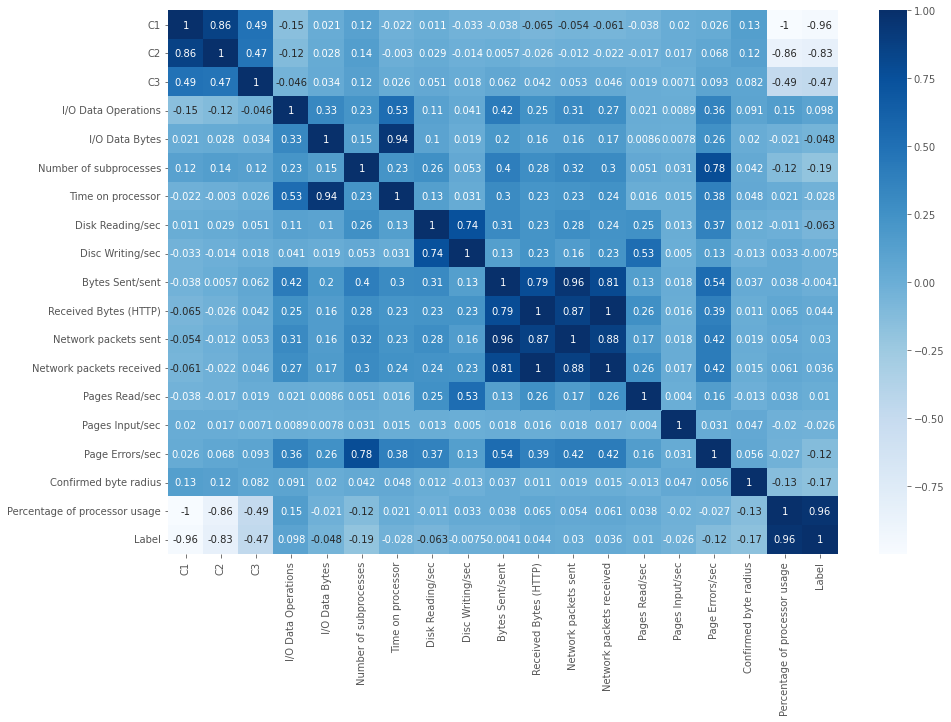

In [ ]:
corr = df_data_z_score.corr()
figure = plt.figure(figsize=(15, 10))
plt.tight_layout()
plt.xlabel('Corr')
sns.heatmap(corr, cmap="Blues", annot=True)

In [ ]:
# Basic correlogram
#sns.pairplot(dfData)
#plt.show()

## Kmeans



### Elbow Curve

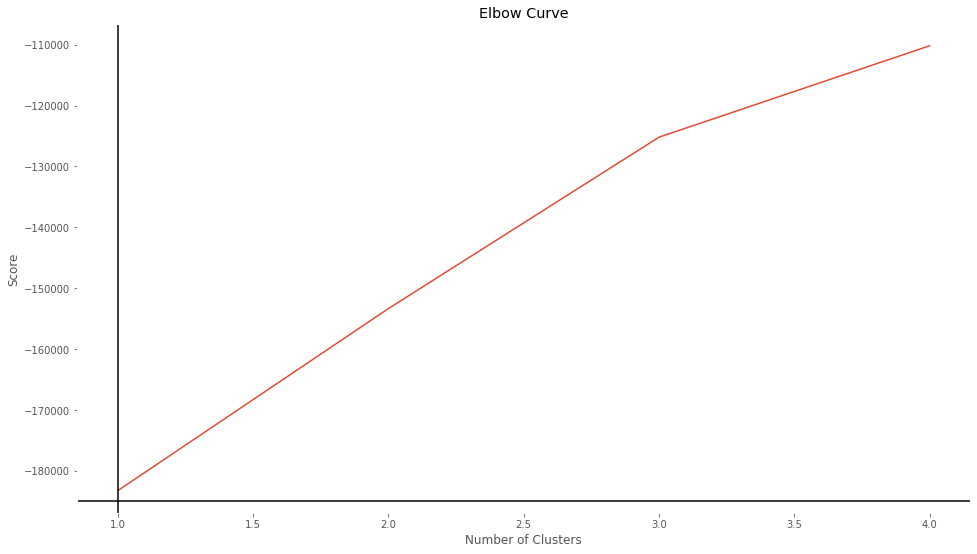

In [ ]:
Nc = range(1, 5)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X_train_z_score).score(X_train_z_score) for i in range(len(kmeans))]
score
fig, ax = plt.subplots()

plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
ax.axhline(y=-185000, color='k')
ax.axvline(x=1, color='k')
#plt.rcParams['axes.facecolor'] = 'white'
plt.show()

### kmeans Method



In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0 , init="k-means++").fit(X_train_z_score)
centroids = kmeans.cluster_centers_
print("centroids : ")
print(centroids)
print("(y) kmeans.labels_")
print(kmeans.labels_)

centroids : 
[[ 5.90758069e-01  5.06903959e-01  2.91325811e-01 -5.36387386e-02
   3.46582429e-02  1.30684053e-01  2.35942803e-02  2.54405364e-02
  -1.80171214e-02  2.44244788e-02 -1.59835928e-03  6.54180473e-03
   4.10289333e-03 -1.33664639e-02  1.84811195e-02  8.40203122e-02
   1.01723236e-01 -5.90816152e-01]
 [-1.60570546e+00 -1.37778644e+00 -7.91835896e-01  1.45792364e-01
  -9.42025725e-02 -3.55204791e-01 -6.41302534e-02 -6.91484557e-02
   4.89712992e-02 -6.63867680e-02  4.34440824e-03 -1.77809024e-02
  -1.11518379e-02  3.63306153e-02 -5.02324659e-02 -2.28370768e-01
  -2.76488064e-01  1.60586333e+00]]
(y) kmeans.labels_
[0 0 1 ... 1 0 1]


In [ ]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X_train_z_score)
closest

array([8211, 5203])

In [ ]:
print("Representante del grupo, elemento mas cercano a su centroid (primer centroide) ")
print("y = ", y_train.iloc[closest[0]-1] , "\n")
print(f"X_train_z_scaler =  \n{ X_train_z_scaler.iloc[closest[0]-1] } \n \n ")
print(f"X_train (original) = \n{ X_train.iloc[closest[0]-1] } \n \n")

Representante del grupo, elemento mas cercano a su centroid (primer centroide) 
y =  0 

X_train_z_scaler =  
C1                               0.188933
C2                               0.789067
C3                              -0.426879
I/O Data Operations             -0.042255
 I/O Data Bytes                  0.022849
Number of subprocesses           1.984751
Time on processor                0.008964
Disk Reading/sec                 0.629624
Disc Writing/sec                 0.129813
Bytes Sent/sent                  1.289200
Received Bytes (HTTP)            0.695891
Network packets sent             0.894490
Network packets received         0.886202
Pages Read/sec                   0.040261
Pages Input/sec                 -0.052311
Page Errors/sec                  2.914607
Confirmed byte radius           -1.271405
Percentage of processor usage   -0.189230
Name: 8210, dtype: float64 
 
 
X_train (original) = 
C1                                   76.034988
C2                               

In [ ]:
print("Representante del grupo, elemento mas cercano a su centroid (segundo centroide) ")
print("y = ", y_train.iloc[closest[1]-1] , "\n")
print(f"X_train_z_scaler =  \n{ X_train_z_scaler.iloc[closest[1]-1] } \n \n ")
print(f"X_train (original) = \n{ X_train.iloc[closest[1]-1] } \n \n")

Representante del grupo, elemento mas cercano a su centroid (segundo centroide) 
y =  1 

X_train_z_scaler =  
C1                              -1.143107
C2                              -0.774442
C3                              -0.532309
I/O Data Operations              3.436716
 I/O Data Bytes                  0.285315
Number of subprocesses           1.807510
Time on processor                0.570580
Disk Reading/sec                 1.731885
Disc Writing/sec                 0.442867
Bytes Sent/sent                  2.273850
Received Bytes (HTTP)            1.928457
Network packets sent             1.181053
Network packets received         2.023086
Pages Read/sec                   0.018458
Pages Input/sec                 -0.052311
Page Errors/sec                  4.151786
Confirmed byte radius            0.713834
Percentage of processor usage    1.143062
Name: 5202, dtype: float64 
 
 
X_train (original) = 
C1                                   22.945764
C2                              

In [ ]:
# el valor de C1 asociado a la muestra 529 y 2379
features_names=dfData['C1'].values
cont = 0
for row in closest:
    print(f'Valor asociado a la muestra mas cercana del centroide delcluster{cont}: '+ str(features_names[row]))
    cont += 1

Valor asociado a la muestra mas cercana del centroide delcluster0: 97.5247966
Valor asociado a la muestra mas cercana del centroide delcluster1: 11.43101265


### Error analysis

#### Label validation on training set

Accuracy: 0.9891
Precision: 0.981373
Recall: 0.978158
F1 score: 0.979763
Cohens kappa: 0.972301
ROC AUC: 0.985648
[[7382   51]
 [  60 2687]]
              precision    recall  f1-score   support

      benign     0.9919    0.9931    0.9925      7433
      malign     0.9814    0.9782    0.9798      2747

    accuracy                         0.9891     10180
   macro avg     0.9867    0.9856    0.9862     10180
weighted avg     0.9891    0.9891    0.9891     10180



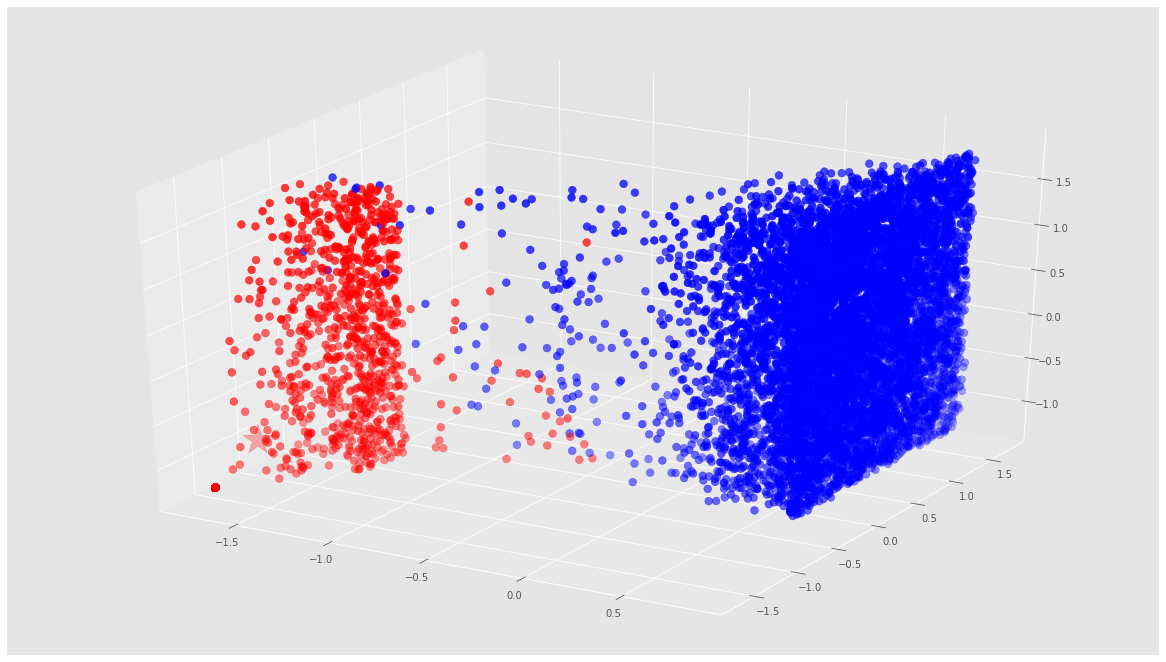

In [ ]:
y_pred = kmeans.predict(X_train_z_score)

accuracy = accuracy_score(y_train, y_pred)
print('Accuracy: %.4f' % accuracy)

precision = precision_score(y_train, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_train, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_train, y_pred)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_train, y_pred)
print('Cohens kappa: %f' % kappa)

# ROC AUC
auc = roc_auc_score(y_train, y_pred)
print('ROC AUC: %f' % auc)

#print('Accuracy  classifier on training set: {:.4f}'.format(kmeans.score(X_train_z_score, y_train)))

# confusion matrix
matrix = confusion_matrix(y_train, y_pred)
print(matrix)

print(classification_report(y_train, y_pred, target_names=['benign', 'malign'], digits=4))

labels = y_pred
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['blue','red']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_train_z_scaler.values[:, 0], X_train_z_scaler.values[:, 1], X_train_z_scaler.values[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [ ]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X_train_z_score)
closest

array([8211, 5203])

In [ ]:
print("Representante del grupo, elemento mas cercano a su centroid (primer centroide) ")
print("y = ", y_train.iloc[closest[0]-1] , "\n")
print(f"X_train_z_scaler =  \n{ X_train_z_scaler.iloc[closest[0]-1] } \n \n ")
print(f"X_train (original) = \n{ X_train.iloc[closest[0]-1] } \n \n")

Representante del grupo, elemento mas cercano a su centroid (primer centroide) 
y =  0 

X_train_z_scaler =  
C1                               0.188933
C2                               0.789067
C3                              -0.426879
I/O Data Operations             -0.042255
 I/O Data Bytes                  0.022849
Number of subprocesses           1.984751
Time on processor                0.008964
Disk Reading/sec                 0.629624
Disc Writing/sec                 0.129813
Bytes Sent/sent                  1.289200
Received Bytes (HTTP)            0.695891
Network packets sent             0.894490
Network packets received         0.886202
Pages Read/sec                   0.040261
Pages Input/sec                 -0.052311
Page Errors/sec                  2.914607
Confirmed byte radius           -1.271405
Percentage of processor usage   -0.189230
Name: 8210, dtype: float64 
 
 
X_train (original) = 
C1                                   76.034988
C2                               

In [ ]:
print("Representante del grupo, elemento mas cercano a su centroid (segundo centroide) ")
print("y = ", y_train.iloc[closest[1]-1] , "\n")
print(f"X_train_z_scaler =  \n{ X_train_z_scaler.iloc[closest[1]-1] } \n \n ")
print(f"X_train (original) = \n{ X_train.iloc[closest[1]-1] } \n \n")

Representante del grupo, elemento mas cercano a su centroid (segundo centroide) 
y =  1 

X_train_z_scaler =  
C1                              -1.143107
C2                              -0.774442
C3                              -0.532309
I/O Data Operations              3.436716
 I/O Data Bytes                  0.285315
Number of subprocesses           1.807510
Time on processor                0.570580
Disk Reading/sec                 1.731885
Disc Writing/sec                 0.442867
Bytes Sent/sent                  2.273850
Received Bytes (HTTP)            1.928457
Network packets sent             1.181053
Network packets received         2.023086
Pages Read/sec                   0.018458
Pages Input/sec                 -0.052311
Page Errors/sec                  4.151786
Confirmed byte radius            0.713834
Percentage of processor usage    1.143062
Name: 5202, dtype: float64 
 
 
X_train (original) = 
C1                                   22.945764
C2                              

#### Label validation on testing set

Accuracy: 0.9902
Precision: 0.988201
Recall: 0.975255
F1 score: 0.981685
Cohens kappa: 0.974978
ROC AUC: 0.985476
[[1851    8]
 [  17  670]]
              precision    recall  f1-score   support

      benign     0.9909    0.9957    0.9933      1859
      malign     0.9882    0.9753    0.9817       687

    accuracy                         0.9902      2546
   macro avg     0.9895    0.9855    0.9875      2546
weighted avg     0.9902    0.9902    0.9902      2546



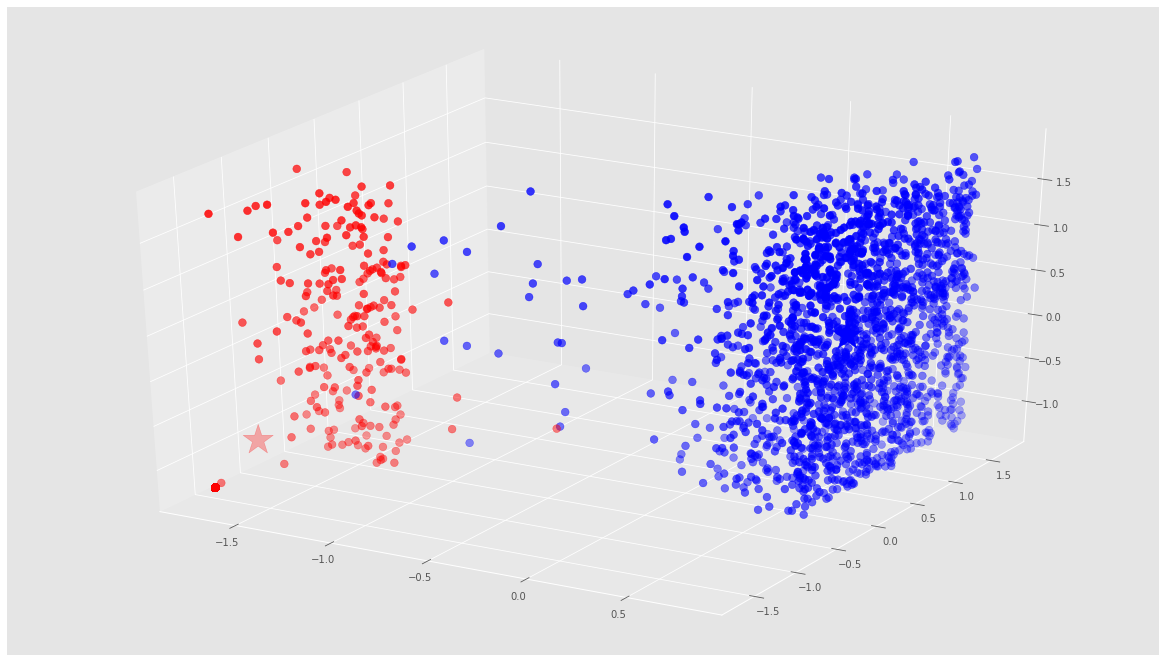

In [ ]:
y_pred = kmeans.predict(X_test_z_score)

accuracy = accuracy_score(y_test ,y_pred)
print('Accuracy: %.4f' % accuracy)

precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, y_pred)
print('Cohens kappa: %f' % kappa)

# ROC AUC
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

print(classification_report(y_test, y_pred, target_names=['benign', 'malign'], digits=4))

labels = y_pred
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['blue','red']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_test_z_scaler.values[:, 0], X_test_z_scaler.values[:, 1], X_test_z_scaler.values[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [ ]:
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X_test_z_score)
closest

array([ 529, 2379])

In [ ]:
print("Representante del grupo, elemento mas cercano a su centroid (primer centroide) ")
print("y = ", y_test.iloc[closest[0]-1] , "\n")
print(f"X_test_z_scaler =  \n{ X_test_z_scaler.iloc[closest[0]-1] } \n \n ")
print(f"X_test (original) = \n{ X_test.iloc[closest[0]-1] } \n \n")

Representante del grupo, elemento mas cercano a su centroid (primer centroide) 
y =  1 

X_test_z_scaler =  
C1                              -1.718830
C2                              -1.640193
C3                              -1.248379
I/O Data Operations              1.446675
 I/O Data Bytes                  0.062119
Number of subprocesses           0.744060
Time on processor                0.548052
Disk Reading/sec                -0.130307
Disc Writing/sec                -0.064967
Bytes Sent/sent                 -0.192229
Received Bytes (HTTP)           -0.218977
Network packets sent            -0.121910
Network packets received        -0.200972
Pages Read/sec                  -0.078027
Pages Input/sec                 -0.052311
Page Errors/sec                 -0.137080
Confirmed byte radius            0.299421
Percentage of processor usage    1.718894
Name: 528, dtype: float64 
 
 
X_test (original) = 
C1                                    0.000000
C2                                  

In [ ]:
print("Representante del grupo, elemento mas cercano a su centroid (segundo centroide) ")
print("y = ", y_test.iloc[closest[1]-1] , "\n")
print(f"X_test_z_scaler =  \n{ X_test_z_scaler.iloc[closest[1]-1] } \n \n ")
print(f"X_test (original) = \n{ X_test.iloc[closest[1]-1] } \n \n")

Representante del grupo, elemento mas cercano a su centroid (segundo centroide) 
y =  0 

X_test_z_scaler =  
C1                               0.684212
C2                               0.710662
C3                              -0.112066
I/O Data Operations              0.024854
 I/O Data Bytes                 -0.161857
Number of subprocesses          -0.496631
Time on processor               -0.316393
Disk Reading/sec                -0.209559
Disc Writing/sec                -0.069571
Bytes Sent/sent                 -0.273117
Received Bytes (HTTP)           -0.225681
Network packets sent            -0.213281
Network packets received        -0.243912
Pages Read/sec                  -0.081670
Pages Input/sec                 -0.052311
Page Errors/sec                 -0.376221
Confirmed byte radius            1.427528
Percentage of processor usage   -0.684603
Name: 2378, dtype: float64 
 
 
X_test (original) = 
C1                                  95.774614
C2                                 

#### Label validation on all set

Accuracy: 0.9892
Precision: 0.982441
Recall: 0.977577
F1 score: 0.980003
Cohens kappa: 0.972638
ROC AUC: 0.985560
[[9232   60]
 [  77 3357]]
              precision    recall  f1-score   support

      benign     0.9917    0.9935    0.9926      9292
      malign     0.9824    0.9776    0.9800      3434

    accuracy                         0.9892     12726
   macro avg     0.9871    0.9856    0.9863     12726
weighted avg     0.9892    0.9892    0.9892     12726



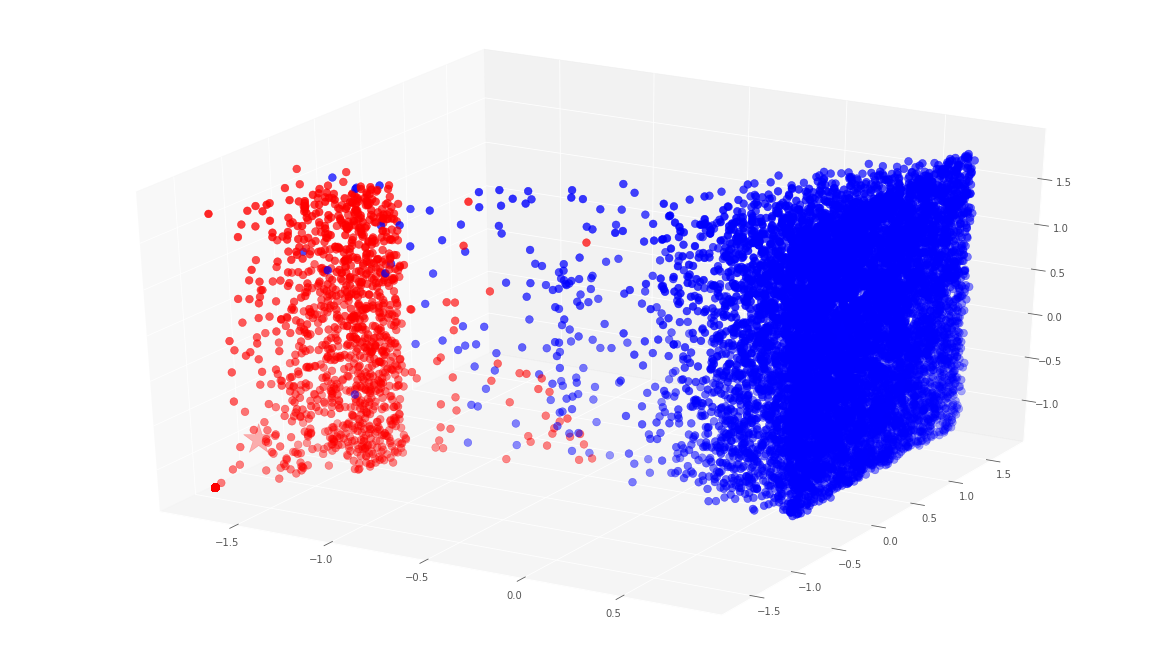

In [ ]:
#scaler = StandardScaler()
#X_all_samples_z_score = scaler.fit_transform(x)
#X_all_samples_z_scaler = pd.DataFrame(X_all_samples_z_score,columns= x.columns)


y_pred = kmeans.predict(X_all_samples_z_score)

accuracy = accuracy_score(y ,y_pred)
print('Accuracy: %.4f' % accuracy)

precision = precision_score(y, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y, y_pred)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y, y_pred)
print('Cohens kappa: %f' % kappa)

# ROC AUC
auc = roc_auc_score(y, y_pred)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y, y_pred)
print(matrix)

print(classification_report(y, y_pred, target_names=['benign', 'malign'], digits=4))

labels = y_pred
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['blue','red']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig, facecolor='white')
ax.set_facecolor('white')
ax.scatter(X_all_samples_z_scaler.values[:, 0], X_all_samples_z_scaler.values[:, 1], X_all_samples_z_scaler.values[:, 2], c=asignar,s=60, facecolor='white')
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [ ]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X_all_samples_z_score)
closest

array([1702, 4095])

In [ ]:
print("Representante del grupo, elemento mas cercano a su centroid (primer centroide) ")
print("y = ", y.iloc[closest[0]-1] , "\n")
print(f"X_all_samples_z_scaler =  \n{ X_all_samples_z_scaler.iloc[closest[0]-1] } \n \n ")
print(f"X_all_samples (original) = \n{ x.iloc[closest[0]-1] } \n \n")

Representante del grupo, elemento mas cercano a su centroid (primer centroide) 
y =  0 

X_all_samples_z_scaler =  
C1                               0.344052
C2                               0.837454
C3                              -0.720499
I/O Data Operations             -0.047431
 I/O Data Bytes                  0.020487
Number of subprocesses           0.031653
Time on processor                0.005284
Disk Reading/sec                 0.624634
Disc Writing/sec                 0.028778
Bytes Sent/sent                  0.213726
Received Bytes (HTTP)           -0.038819
Network packets sent             0.087757
Network packets received        -0.031532
Pages Read/sec                  -0.028829
Pages Input/sec                 -0.050035
Page Errors/sec                  2.159153
Confirmed byte radius            0.128077
Percentage of processor usage   -0.344314
Name: 1701, dtype: float64 
 
 
X_all_samples (original) = 
C1                                   82.214579
C2                   

In [ ]:
print("Representante del grupo, elemento mas cercano a su centroid (segundo centroide) ")
print("y = ", y.iloc[closest[1]-1] , "\n")
print(f"X_all_samples_z_scaler =  \n{ X_all_samples_z_scaler.iloc[closest[1]-1] } \n \n ")
print(f"X_all_samples (original) = \n{ x.iloc[closest[1]-1] } \n \n")

Representante del grupo, elemento mas cercano a su centroid (segundo centroide) 
y =  1 

X_all_samples_z_scaler =  
C1                              -1.515071
C2                              -0.779766
C3                              -0.383510
I/O Data Operations             -0.239357
 I/O Data Bytes                 -0.149980
Number of subprocesses           0.207803
Time on processor               -0.203119
Disk Reading/sec                -0.023889
Disc Writing/sec                -0.071055
Bytes Sent/sent                 -0.185727
Received Bytes (HTTP)           -0.142972
Network packets sent            -0.153757
Network packets received        -0.149771
Pages Read/sec                  -0.076707
Pages Input/sec                 -0.050035
Page Errors/sec                 -0.229776
Confirmed byte radius           -0.322233
Percentage of processor usage    1.515125
Name: 4094, dtype: float64 
 
 
X_all_samples (original) = 
C1                                   8.214848
C2                   

#Feature Selection

## Feature selection Methods

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5,  random_state=12345)
kfold= StratifiedKFold(n_splits=5, random_state=12345,shuffle=True)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
# feature selection
def filters_select_features(X_train, y_train, X_test, func, k):
    # configure to select a subset of features
    fs = SelectKBest(score_func=func, k=k)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

### p-vale



In [ ]:
# Statistical methods
kbestf = 'all'
X_train_anova, X_test_anova, fs_anova = filters_select_features(X_train_z_scaler, y_train, X_test_z_scaler, f_classif, k=kbestf)
# X_train_anova =pd.DataFrame(X_train_anova, columns=list(fs_anova.get_feature_names_out()))
# X_test_anova =pd.DataFrame(X_test_anova, columns=list(fs_anova.get_feature_names_out()))
f_anova, p_value = f_classif(X_train_z_scaler, y_train)
anova_scores = pd.DataFrame(list(zip(X_train_z_scaler.columns, fs_anova.scores_, fs_anova.pvalues_)),
                            columns=['ftr', 'score', 'pval'])
anova_scores.sort_values(by='score', ascending=False)
anova_scores_p_value = anova_scores[anova_scores['pval'].apply(lambda x: x <= 0.05)]
print(anova_scores[anova_scores['pval'].apply(lambda x: x >0.05)])
print(anova_scores_p_value.shape)
anova_scores_p_value['ftr'].values.tolist()

                 ftr     score      pval
8   Disc Writing/sec  2.011160  0.156177
9    Bytes Sent/sent  0.267416  0.605081
13    Pages Read/sec  0.083984  0.771975
(15, 3)


['C1',
 'C2',
 'C3',
 'I/O Data Operations',
 ' I/O Data Bytes',
 'Number of subprocesses',
 'Time on processor',
 'Disk Reading/sec',
 'Received Bytes (HTTP)',
 'Network packets sent',
 'Network packets received',
 'Pages Input/sec',
 'Page Errors/sec',
 'Confirmed byte radius',
 'Percentage of processor usage']

### anova scores 4 features

In [ ]:
kbestf = 4 
_, _, fs_anova = filters_select_features(X_train_z_scaler, y_train, X_test_z_scaler, f_classif, k=kbestf)
# X_train_anova =pd.DataFrame(X_train_anova, columns=list(fs_anova.get_feature_names_out()))
# X_test_anova =pd.DataFrame(X_test_anova, columns=list(fs_anova.get_feature_names_out()))
# f_anova, p_value = f_classif(X_train, Y_train)
anova_scores = pd.DataFrame(list(zip(X_train_z_scaler.columns, fs_anova.scores_, fs_anova.pvalues_)),
                            columns=['ftr', 'score', 'pval'])
anova_scores_4_features = anova_scores.sort_values(by='score', ascending=False)[:kbestf]
anova_scores_4_features


,ftr,score,pval
17,Percentage of processor usage,132743.208143,0.0
0,C1,132388.076346,0.0
1,C2,22227.459825,0.0
2,C3,2936.165401,0.0


### anova scores 10 features

In [ ]:
# select k=10
kbestf = 10
_, _, fs_anova = filters_select_features(X_train_z_scaler, y_train, X_test_z_scaler, f_classif, k=kbestf)
# X_train_anova =pd.DataFrame(X_train_anova, columns=list(fs_anova.get_feature_names_out()))
# X_test_anova =pd.DataFrame(X_test_anova, columns=list(fs_anova.get_feature_names_out()))
# f_anova, p_value = f_classif(X_train, Y_train)
anova_scores = pd.DataFrame(list(zip(X_train_z_scaler.columns, fs_anova.scores_, fs_anova.pvalues_)),
                            columns=['ftr', 'score', 'pval'])
anova_scores_10_features = anova_scores.sort_values(by='score', ascending=False)[:kbestf]
anova_scores_10_features

,ftr,score,pval
17,Percentage of processor usage,132743.208143,0.000000e+00
0,C1,132388.076346,0.000000e+00
1,C2,22227.459825,0.000000e+00
2,C3,2936.165401,0.000000e+00
5,Number of subprocesses,397.865476,7.240812e-87
16,Confirmed byte radius,308.864811,3.895120e-68
15,Page Errors/sec,156.823204,1.025131e-35
3,I/O Data Operations,108.568498,2.703785e-25
7,Disk Reading/sec,39.102723,4.182236e-10
4,I/O Data Bytes,25.536806,4.415649e-07


In [ ]:
# Wrappers method

In [ ]:
# feature selection
def wrapper_select_features(X_train, y_train, X_test, estimator, step, min_features_to_select):
    # configure to select all features
    rfe = RFECV(estimator=estimator, step=step, cv=kfold,min_features_to_select=min_features_to_select, scoring='f1', verbose=2, n_jobs=-1)
    rfe.fit(X_train, y_train)
    # transform train input data
    X_train_rfe = rfe.transform(X_train)
    # transform test input data
    X_test_rfe= rfe.transform(X_test)
    return X_train_rfe, X_test_rfe, rfe

### RFECV wrapper

In [ ]:
estimator_lr = LogisticRegression()
min_features_to_select = 1
step_rfe = 1
X_train_fs_z_scaler, X_test_fs_z_scaler, rfe = wrapper_select_features(X_train_z_scaler,
                                                     y_train, X_test_z_scaler, estimator_lr, step=step_rfe,
                                                     min_features_to_select=min_features_to_select)

#X_train_fs_z_scaler = pd.DataFrame(X_train_fs_z_scaler, columns=list(X_train.columns[rfe.ranking_ == 1]))
#X_test_fs_z_scaler = pd.DataFrame(X_test_fs_z_scaler, columns=list(X_test.columns[rfe.ranking_ == 1]))

print('Optimal number of features:', rfe.n_features_)
pd.DataFrame(X_train.columns[rfe.ranking_ == 1], columns=['Best features'])
#rfe.grid_scores_

Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Optimal number of features: 12


,Best features
0,C1
1,C2
2,I/O Data Operations
3,I/O Data Bytes
4,Time on processor
5,Disc Writing/sec
6,Bytes Sent/sent
7,Received Bytes (HTTP)
8,Network packets sent
9,Network packets received


Optimal number of features : 12


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


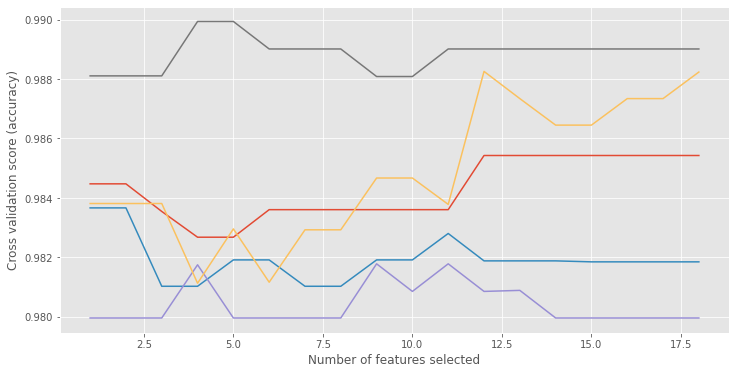

In [ ]:
print("Optimal number of features : %d" % rfe.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(12,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfe.grid_scores_) + min_features_to_select),
    rfe.grid_scores_,
)
plt.show()

## Summary datasets

In [ ]:
#------------- train / test  anova pvalue -------------------------
X_train_pvalue_anova = X_train_z_scaler[anova_scores_p_value['ftr'].values.tolist()]
X_test_pvalue_anova = X_test_z_scaler[anova_scores_p_value['ftr'].values.tolist()]

#------------- train / test anova 4 features
X_train_4_f_anova = X_train_z_scaler[anova_scores_4_features['ftr'].values.tolist()]
X_test_4_f_anova = X_test_z_scaler[anova_scores_4_features['ftr'].values.tolist()]

##------------- train / test anova 10 features
X_train_10_f_anova = X_train_z_scaler[anova_scores_10_features['ftr'].values.tolist()]
X_test_10_f_anova = X_test_z_scaler[anova_scores_10_features['ftr'].values.tolist()]

##------------- train / test RFECV wrapper features
X_train_fs_z_scaler = pd.DataFrame(X_train_fs_z_scaler, columns=list(X_train.columns[rfe.ranking_ == 1]))
X_test_fs_z_scaler = pd.DataFrame(X_test_fs_z_scaler, columns=list(X_test.columns[rfe.ranking_ == 1]))

#X_train_pvalue_anova
#X_train_4_f_anova
#X_train_10_f_anova
#X_test_fs_z_scaler

In [ ]:
cross_val_dict = {'z_scaler_data': '', 'z_scaler_p_value': '', 'z_scaler_4_features':'', 'z_scaler_10_features':'' , 'X_train_fs_z_scaler':''}
dataset_feature_select = {'z_scaler_data': X_train_z_scaler, 'z_scaler_p_value':X_train_pvalue_anova,'z_scaler_4_features': X_train_4_f_anova, 'z_scaler_10_features':X_train_10_f_anova, 'X_train_fs_z_scaler': X_train_fs_z_scaler}

# Logistic Regression

## Logistic Regression Basic Model

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s finished


Accuracy  classifier on test set: 0.9937
              precision    recall  f1-score   support

      benign     0.9957    0.9957    0.9957      1859
      malign     0.9884    0.9884    0.9884       687

    accuracy                         0.9937      2546
   macro avg     0.9920    0.9920    0.9920      2546
weighted avg     0.9937    0.9937    0.9937      2546

[[1851    8]
 [   8  679]]


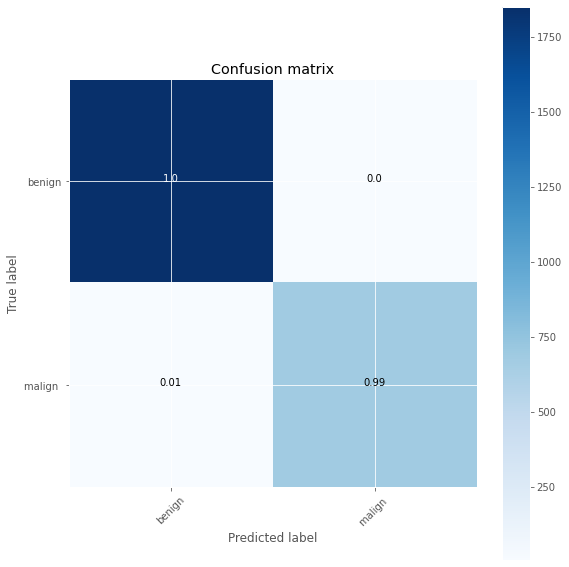

In [ ]:
estimator_lr = LogisticRegression(verbose=1, n_jobs=-1).fit(X_train_z_scaler, y_train)

#print('Accuracy  classifier on training set: {:.4f}'.format(estimator_lr.score(X_train_z_scaler, y_train)))

print('Accuracy  classifier on test set: {:.4f}'.format(estimator_lr.score(X_test_z_scaler, y_test)))

y_pred = estimator_lr.predict(X_test_z_scaler)
print(classification_report(y_test, y_pred, target_names=['benign', 'malign'], digits=4))

cm = confusion_matrix(y_test, y_pred)
print(cm)
figure = plot_confusion_matrix(cm, target_list)

## Cross-Validation LR - Train

In [ ]:
cross_val_dict_LR = {}
for key,value in dataset_feature_select.items():
    scores = cross_val_score(estimator_lr, value, y_train, cv=skf)
    # report performance
    print('Dataset: ', key)
    print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
    cross_val_dict_LR[key]= (mean(scores), std(scores))
cross_val_dict_LR

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1

Dataset:  z_scaler_data
Accuracy: 0.992 (0.002)


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBacken

Dataset:  z_scaler_p_value
Accuracy: 0.991 (0.002)


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBacken

Dataset:  z_scaler_4_features
Accuracy: 0.991 (0.002)


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBacken

Dataset:  z_scaler_10_features
Accuracy: 0.991 (0.002)


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBacken

Dataset:  X_train_fs_z_scaler
Accuracy: 0.992 (0.002)


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished


{'z_scaler_data': (0.9917288801571709, 0.002091576828288534),
 'z_scaler_p_value': (0.9911787819253439, 0.002090653924467279),
 'z_scaler_4_features': (0.9911984282907662, 0.002307590862086607),
 'z_scaler_10_features': (0.9912573673870334, 0.002138658257080285),
 'X_train_fs_z_scaler': (0.9919646365422397, 0.0018631964981577487)}

NameError: ignored

## Logistic Regression Models for different features numbers

### Logistic Regression Model with p-value anova dataset

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished


Accuracy  classifier on test set: 0.9937
              precision    recall  f1-score   support

      benign     0.9957    0.9957    0.9957      1859
      malign     0.9884    0.9884    0.9884       687

    accuracy                         0.9937      2546
   macro avg     0.9920    0.9920    0.9920      2546
weighted avg     0.9937    0.9937    0.9937      2546

[[1851    8]
 [   8  679]]


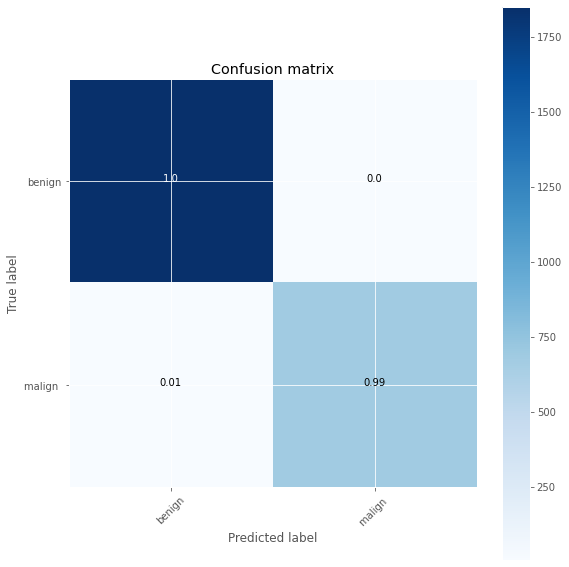

In [ ]:
#X_train_pvalue_anova

estimator_lr = LogisticRegression(verbose=1, n_jobs=-1).fit(
    X_train_pvalue_anova, y_train)

#print('Accuracy  classifier on training set: {:.3f}'format(estimator_lr.score(X_train_pvalue_anova, y_train)))
print('Accuracy  classifier on test set: {:.4f}'.format(estimator_lr.score(X_test_pvalue_anova, y_test)))

y_pred = estimator_lr.predict(X_test_pvalue_anova)
print(classification_report(y_test, y_pred , target_names=['benign', 'malign'], digits=4))
cm = confusion_matrix(y_test, y_pred)
print(cm)
figure = plot_confusion_matrix(cm, target_list)

###Logistic Regression Model with anova scores 4 features dataset

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished


Accuracy  classifier on test set: 0.9918
              precision    recall  f1-score   support

      benign     0.9946    0.9941    0.9944      1859
      malign     0.9840    0.9854    0.9847       687

    accuracy                         0.9918      2546
   macro avg     0.9893    0.9898    0.9895      2546
weighted avg     0.9918    0.9918    0.9918      2546

[[1848   11]
 [  10  677]]


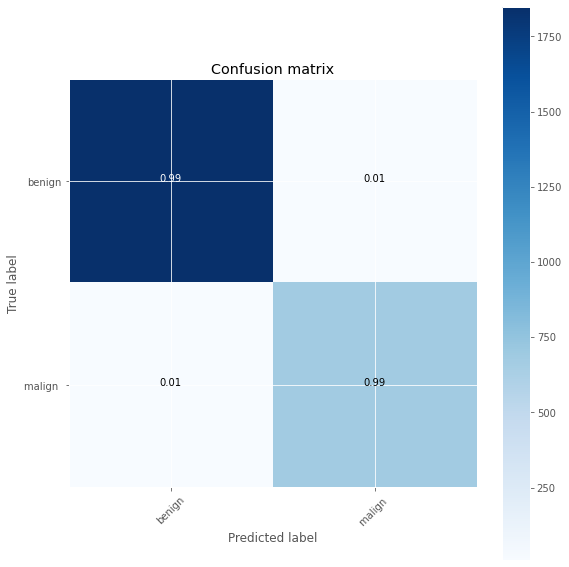

In [ ]:
#X_train_4_f_anova

estimator_lr = LogisticRegression(verbose=1, n_jobs=-1).fit(
    X_train_4_f_anova, y_train)

#print('Accuracy  classifier on training set: {:.3f}'.format(estimator_lr.score(X_train_4_f_anova, y_train)))
print('Accuracy  classifier on test set: {:.4f}' .format(estimator_lr.score(X_test_4_f_anova, y_test)))

y_pred = estimator_lr.predict(X_test_4_f_anova)
print(classification_report(y_test, y_pred,target_names=['benign', 'malign'], digits=4))
cm = confusion_matrix(y_test, y_pred)
print(cm)
figure = plot_confusion_matrix(cm, target_list)

### Logistic Regression Model with anova scores 10 features dataset

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished


Accuracy  classifier on test set: 0.9925
              precision    recall  f1-score   support

      benign     0.9957    0.9941    0.9949      1859
      malign     0.9841    0.9884    0.9862       687

    accuracy                         0.9925      2546
   macro avg     0.9899    0.9912    0.9905      2546
weighted avg     0.9926    0.9925    0.9925      2546

[[1848   11]
 [   8  679]]


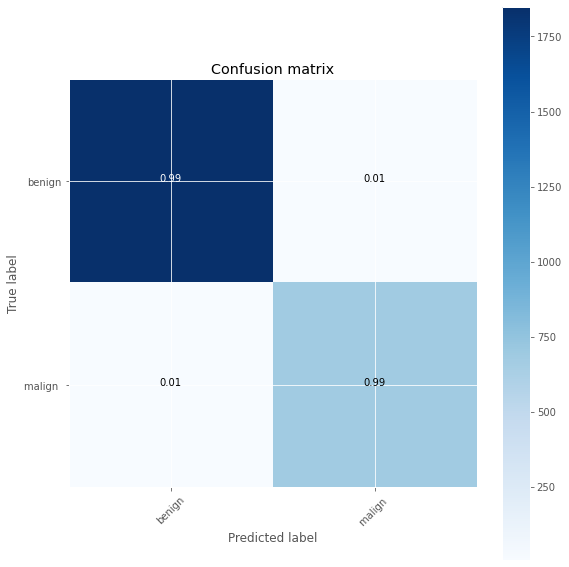

In [ ]:
#X_train_10_f_anova
estimator_lr = LogisticRegression(verbose=1, n_jobs=-1).fit(
    X_train_10_f_anova, y_train)

#print('Accuracy  classifier on training set: {:.3f}' .format(estimator_lr.score(X_train_10_f_anova, y_train)))
print('Accuracy  classifier on test set: {:.4f}'.format(estimator_lr.score(X_test_10_f_anova, y_test)))

y_pred = estimator_lr.predict(X_test_10_f_anova)
print(classification_report(y_test, y_pred, target_names=['benign', 'malign'], digits=4))
cm = confusion_matrix(y_test, y_pred)
print(cm)
figure = plot_confusion_matrix(cm, target_list)

### Logistic Regression model with RFECV wrapper (12) features dataset

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.9s finished


Accuracy  classifier on test set: 0.9941
              precision    recall  f1-score   support

      benign     0.9957    0.9962    0.9960      1859
      malign     0.9898    0.9884    0.9891       687

    accuracy                         0.9941      2546
   macro avg     0.9927    0.9923    0.9925      2546
weighted avg     0.9941    0.9941    0.9941      2546

[[1852    7]
 [   8  679]]


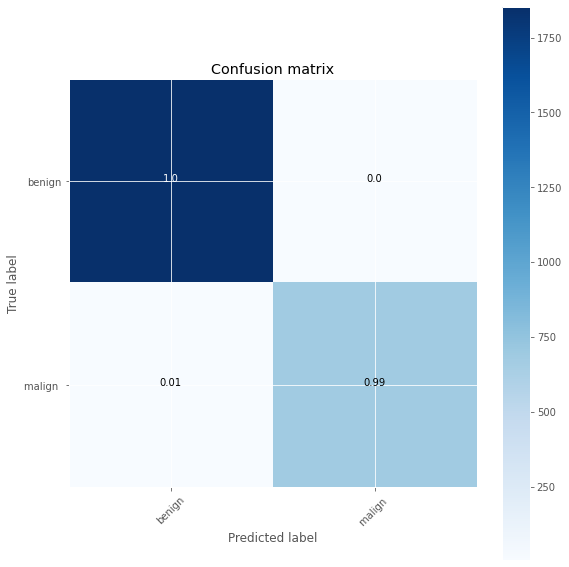

In [ ]:
#X_train_fs_z_scaler
estimator_lr = LogisticRegression(verbose=1, n_jobs=-1, solver='lbfgs', C=1, penalty='l2').fit(
    X_train_fs_z_scaler, y_train)

#print('Accuracy  classifier on training set: {:.3f}'.format(estimator_lr.score(X_train_fs_z_scaler, y_train)))
print('Accuracy  classifier on test set: {:.4f}'.format(estimator_lr.score(X_test_fs_z_scaler, y_test)))

y_pred = estimator_lr.predict(X_test_fs_z_scaler)
print(classification_report(y_test, y_pred,target_names=['benign', 'malign'], digits=4))
cm = confusion_matrix(y_test, y_pred)
print(cm)
figure = plot_confusion_matrix(cm, target_list)

### Grid Search LR

In [ ]:
#Roc AUC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import plotly.graph_objects as go
import plotly.express as px
# One hot encode the labels in order to plot them
y_onehot = pd.get_dummies(y_test, columns=estimator_lr.classes_)

# predict probabilities
y_prob = estimator_lr.predict_proba(X_test_z_scaler)
# Create an empty figure, and iteratively add new lines
# every time we compute a new class
fig = go.Figure()
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

for i in range(y_prob.shape[1]):
    y_true = y_onehot.iloc[:, i]
    y_score = y_prob[:, i]

    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc_score = roc_auc_score(y_true, y_score)

    name = f"{target_list[i]} (AUC={auc_score:.2f})"
    fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))

fig.update_layout(
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    yaxis=dict(scaleanchor="x", scaleratio=1),
    xaxis=dict(constrain='domain'),
    width=700, height=700
)
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- C3
- Disk Reading/sec
- Number of subprocesses
- Page Errors/sec
- Pages Input/sec
- ...
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: ignored

In [ ]:
y_pred = estimator_lr.predict(X_test_fs_z_scaler)
print(y_pred[1000])
print(y_test.iloc[1000])
print(y_pred[0])
print(y_test.iloc[0])

1
1
0
0


In [ ]:
#Interpretación
# get importance
# get importance
importance = estimator_lr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: {}  Score: {}' .format(X_test_fs_z_scaler.iloc[[1000]].columns[i],v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
estimator_lr.coef_

array([[-2.24260182, -0.70098263,  0.53825377,  0.69662082, -0.95567767,
        -0.28525627, -0.7544573 ,  0.53149228,  0.89010434, -0.58786903,
        -0.81803458,  2.273326  ]])

In [ ]:
#Interpretación
# get importance
# get importance
importance = estimator_lr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: {}  Score: {}' .format(X_test_fs_z_scaler.iloc[[200]].columns[i],v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
plt.figure(figsize=(12, 10))
df_ranking_cv = pd.DataFrame()
df_ranking_cv['attr'] = X_train_fs_z_scaler.columns.tolist()
importance= estimator_lr.coef_[0]# clase 0 o sentimiento negativo
df_ranking_cv['importance'] = importance
my_cmap = plt.get_cmap("coolwarm")
plot_features = df_ranking_cv.sort_values('importance', ascending=False).head(15)
plt.barh(y=plot_features['attr'], width=plot_features['importance'], color=my_cmap(plot_features['importance'].sort_values()))
plt.title('Efectos de los coeficientes', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('coefficients', fontsize=14, labelpad=20)
plt.ylabel('features', fontsize=14, labelpad=20)
plt.gca().invert_yaxis()
# plt.savefig(r"D:\Dataset_Covid_19_IEEE\data\modelado\resultados_svm\importancia_positivas.png")
plt.show()

In [ ]:
X_train_fs_z_scaler_bis = X_train_fs_z_scaler[['util_proc', 'C1']]
# X_train_fs_z_scaler_bis = X_train_fs_z_scaler_bis.rename(columns={'util_proc': 0, 'C1':1})

X_test_fs_z_scaler_bis = X_test_fs_z_scaler[['util_proc', 'C1']]
# X_test_fs_z_scaler_bis = X_test_fs_z_scaler_bis.rename(columns={'util_proc': 0, 'C1':1})
estimator_lr = LogisticRegression(verbose=1, n_jobs=-1).fit(
    X_train_fs_z_scaler_bis, y_train)

In [ ]:
X_test_fs_z_scaler_bis

In [ ]:
# importing modules
import numpy as np
from matplotlib.colors import ListedColormap

# seting x_train and y_train
x_set, y_set = X_test_fs_z_scaler_bis.values, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))

# Ploting
plt.contourf(x1, x2, estimator_lr.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red','yellow' )))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

# for loop to iterate the data
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('black', 'green'))(i), label = j)

# labeling the graph
plt.title('Logistic Regression (Training set)')
plt.xlabel('Util proc')
plt.ylabel('C1')
plt.legend()
plt.show()

In [ ]:
x_set.values[:,0]


In [ ]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# perform permutation importance
results = permutation_importance(estimator_lr, X_train_fs_z_scaler, y_train, scoring='f1')
# get importance
importance = results.importances_mean
importance=np.sort(importance)
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: {}  Score: {}' .format(X_train_fs_z_scaler.columns[i],v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))] ,importance)
pyplot.show()

In [ ]:
from sklearn.metrics import get_scorer_names
get_scorer_names()

#XGBoost

## XGBoost Basic Model

[20:00:29] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:00:29] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:00:29] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:00:29] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:00:29] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:00:29] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:00:29] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:00:29] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nod

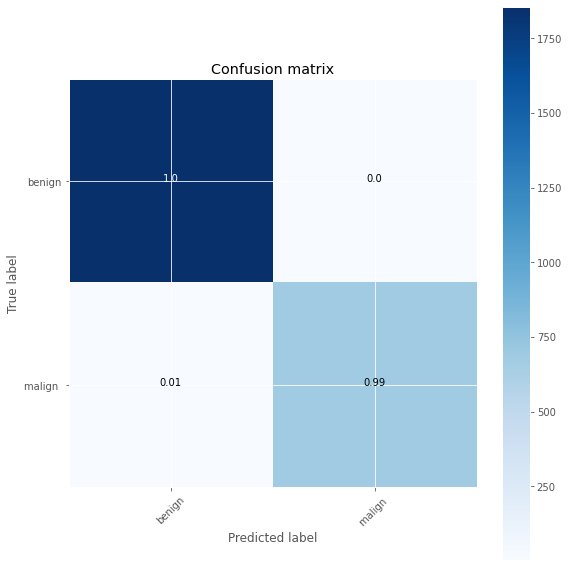

In [ ]:
#estimator_xgb =XGBClassifier(verbosity=2,tree_method='gpu_hist',   max_bin=255, predictor='gpu_predictor' )
estimator_xgb = XGBClassifier(verbosity=2,   max_bin=255, predictor='cpu_predictor' )
estimator_xgb.fit(X_train_z_scaler, y_train)

#print('Accuracy  classifier on training set: {:.3f}' .format(estimator_xgb.score(X_train_z_scaler, y_train)))
print('Accuracy  classifier on test set: {:.4f}'.format(estimator_xgb.score(X_test_z_scaler, y_test)))

y_pred = estimator_xgb.predict(X_test_z_scaler)
print(classification_report(y_test, y_pred,target_names=['benign', 'malign'], digits=4)) 
cm = confusion_matrix(y_test, y_pred)
print(cm)
figure = plot_confusion_matrix(cm, target_list)

## Cross-Validation XGBoost - Train


In [ ]:
from numpy import mean
from numpy import std
cross_val_dict_XGBoost = {}
for key,value in dataset_feature_select.items():
    scores = cross_val_score(estimator_xgb, value, y_train, cv=skf)#, scoring=)    
    # report performance
    print('Dataset: ', key)
    print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))
    cross_val_dict_XGBoost[key]= (mean(scores), std(scores))
cross_val_dict_XGBoost

Se han truncado las últimas 5000 líneas del flujo de salida.
[20:04:08] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:04:08] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:04:08] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:04:08] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:04:08] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:04:08] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[20:04:08] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[20:04:08] INFO: /workspace/src/tree

{'z_scaler_data': (0.9947347740667977, 0.0016172193027313734),
 'z_scaler_p_value': (0.9946758349705306, 0.0016593911523598277),
 'z_scaler_4_features': (0.9908251473477407, 0.0018415258397564633),
 'z_scaler_10_features': (0.9942239685658154, 0.0017255280952885221),
 'X_train_fs_z_scaler': (0.995009823182711, 0.0017718799820643518)}

In [ ]:
cross_val_dict_LR

In [ ]:
cross_val_dict_XGBoost

## XGBoost Models for different features numbers

### XGBoost Model with p-value anova dataset

[20:39:01] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:39:01] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:39:01] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:39:01] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:39:01] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:39:01] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:39:01] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:39:01] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nod

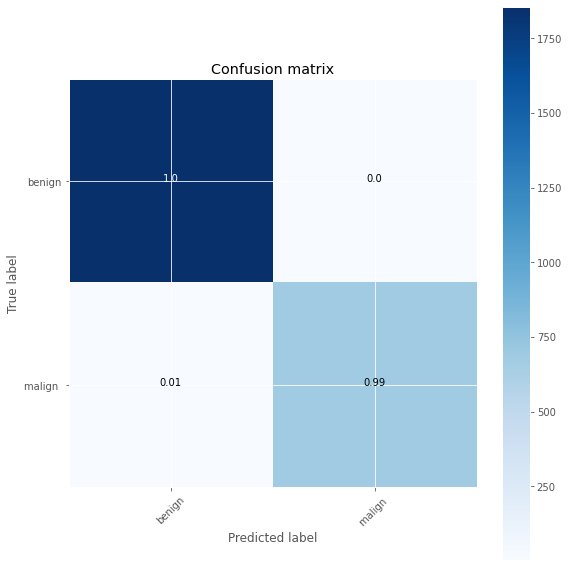

In [ ]:
#X_train_pvalue_anova

estimator_xgb = XGBClassifier(verbosity=2,   max_bin=255, predictor='cpu_predictor' )
estimator_xgb.fit(X_train_pvalue_anova, y_train)

#print('Accuracy  classifier on training set: {:.3f}'.format(estimator_xgb.score(X_train_pvalue_anova, y_train)))
print('Accuracy  classifier on test set: {:.4f}'.format(estimator_xgb.score(X_test_pvalue_anova, y_test)))

y_pred = estimator_xgb.predict(X_test_pvalue_anova)
print(classification_report(y_test, y_pred,target_names=['benign', 'malign'], digits=4))
cm = confusion_matrix(y_test, y_pred)
print(cm)
figure = plot_confusion_matrix(cm, target_list)

###XGBoost Model with anova scores 4 features dataset

[20:39:57] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:39:57] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:39:57] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[20:39:57] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:39:57] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[20:39:57] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[20:39:57] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:39:57] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nod

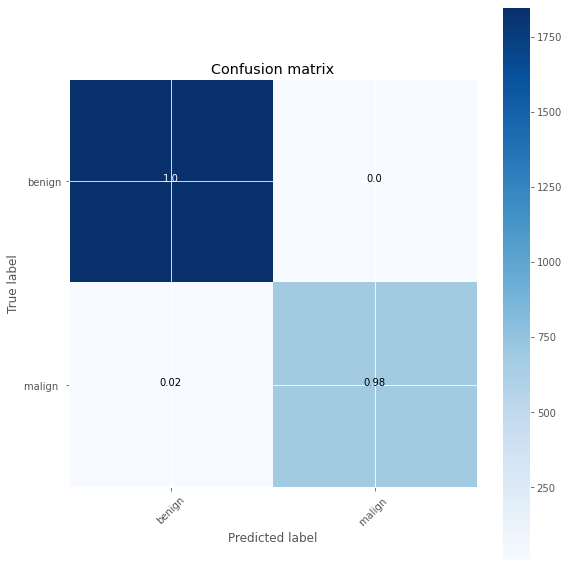

In [ ]:
#X_train_4_f_anova

estimator_xgb = XGBClassifier(verbosity=2,   max_bin=255, predictor='cpu_predictor' )
estimator_xgb.fit(X_train_4_f_anova, y_train)

#print('Accuracy  classifier on training set: {:.3f}'.format(estimator_xgb.score(X_train_4_f_anova, y_train)))
print('Accuracy  classifier on test set: {:.4f}'.format(estimator_xgb.score(X_test_4_f_anova, y_test)))

y_pred = estimator_xgb.predict(X_test_4_f_anova)
print(classification_report(y_test, y_pred,target_names=['benign', 'malign'], digits=4))
cm = confusion_matrix(y_test, y_pred)

print(cm)
figure = plot_confusion_matrix(cm, target_list)

###XGBoost Model with anova scores 10 features dataset

[20:46:43] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:46:43] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[20:46:43] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:46:43] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:46:43] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:46:43] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:46:43] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:46:43] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nod

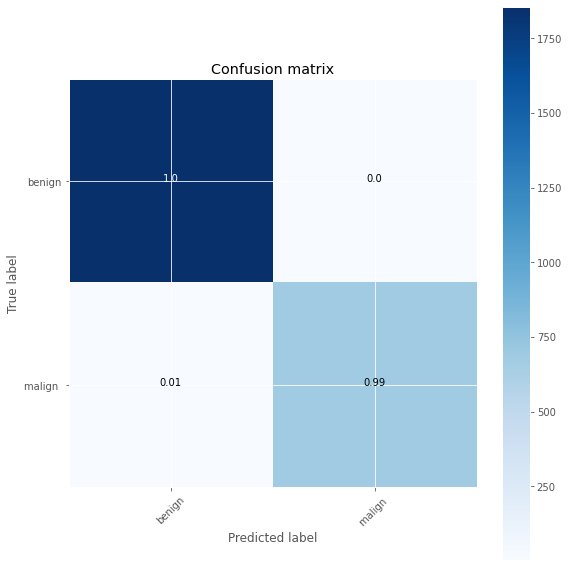

In [ ]:
#X_train_10_f_anova

estimator_xgb = XGBClassifier(verbosity=2,   max_bin=255, predictor='cpu_predictor' )
estimator_xgb.fit(X_train_10_f_anova, y_train)

#print('Accuracy  classifier on training set: {:.3f}'.format(estimator_xgb.score(X_train_10_f_anova, y_train)))
print('Accuracy  classifier on test set: {:.4f}'.format(estimator_xgb.score(X_test_10_f_anova, y_test)))

y_pred = estimator_xgb.predict(X_test_10_f_anova)
print(classification_report(y_test, y_pred, target_names=['benign', 'malign'], digits=4))
cm = confusion_matrix(y_test, y_pred)
print(cm)
figure = plot_confusion_matrix(cm, target_list)

### XGBoost Model with RFECV wrapper(12) features dataset

[20:44:48] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:44:48] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:44:48] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:44:48] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:44:48] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:44:48] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:44:48] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[20:44:48] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nod

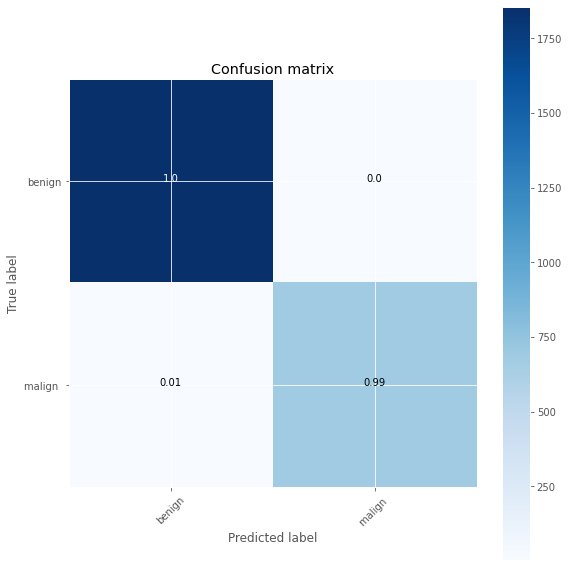

In [ ]:
#X_train_fs_z_scaler

estimator_xgb = XGBClassifier(verbosity=2,   max_bin=255, predictor='cpu_predictor' )
estimator_xgb.fit(X_train_fs_z_scaler, y_train)

#print('Accuracy  classifier on training set: {:.3f}'.format(estimator_xgb.score(X_train_fs_z_scaler, y_train)))
print('Accuracy  classifier on test set: {:.4f}'.format(estimator_xgb.score(X_test_fs_z_scaler, y_test)))

y_pred = estimator_xgb.predict(X_test_fs_z_scaler)
print(classification_report(y_test, y_pred, target_names=['benign', 'malign'], digits=4))
cm = confusion_matrix(y_test, y_pred)
print(cm)
figure = plot_confusion_matrix(cm, target_list)

## Grid Search XGBoost

In [ ]:
estimator_xgb = XGBClassifier(verbosity=2,   max_bin=255, predictor='cpu_predictor' )
estimator_xgb.fit(X_train_fs_z_scaler, y_train)

print('Accuracy  classifier on training set: {:.3f}'
      .format(estimator_xgb.score(X_train_fs_z_scaler, y_train)))
print('Accuracy  classifier on test set: {:.3f}'
      .format(estimator_xgb.score(X_test_fs_z_scaler, y_test)))

y_pred = estimator_xgb.predict(X_test_fs_z_scaler)
print(classification_report(y_test, y_pred, digits = 4))
cm = confusion_matrix(y_test, y_pred)
figure = plot_confusion_matrix(cm, target_list)

In [ ]:
perm_importance = permutation_importance(estimator_xgb, X_test_fs_z_scaler, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X_train_z_scaler.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")


In [ ]:
 perm_importance.importances_mean.argsort()

In [ ]:
perm_importance = permutation_importance(estimator_xgb, X_train_fs_z_scaler, y_train)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X_train_z_scaler.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")


In [ ]:
plt.figure(figsize=(12, 10))
my_cmap = plt.get_cmap("coolwarm")
feat_importances = pd.DataFrame(estimator_xgb.feature_importances_, index=X_train_fs_z_scaler.columns.values.tolist(),columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances = feat_importances.reset_index()
feat_importances = feat_importances.rename(columns={'index':'features'})
plot_features  = feat_importances.sort_values(by='Importance', ascending=False).head(12)
plt.barh(y=plot_features['features'], width=plot_features['Importance'],color=my_cmap(plot_features['Importance'].sort_values()))
plt.title('Feature importance', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('importance', fontsize=14, labelpad=20)
plt.ylabel('features', fontsize=14, labelpad=20)
plt.gca().invert_yaxis()
plt.show()

In [ ]:
feature_important = estimator_xgb.get_booster().get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=True)
data.nlargest(10, columns="score").sort_values(by='score').plot.barh(y='score',figsize = (15,10)) ## plot top 40 features

In [ ]:
estimator_xgb.feature_importances_

In [ ]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(estimator_xgb, num_trees=50, ax=ax)
plt.show()

In [ ]:
# Roc-Auc

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import plotly.graph_objects as go
import plotly.express as px
# One hot encode the labels in order to plot them
y_onehot = pd.get_dummies(y_test, columns=estimator_xgb.classes_)

# predict probabilities
y_prob = estimator_xgb.predict_proba(X_test_z_scaler)
# Create an empty figure, and iteratively add new lines
# every time we compute a new class
fig = go.Figure()
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

for i in range(y_prob.shape[1]):
    y_true = y_onehot.iloc[:, i]
    y_score = y_prob[:, i]

    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc_score = roc_auc_score(y_true, y_score)

    name = f"{target_list[i]} (AUC={auc_score:.2f})"
    fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))

fig.update_layout(
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    yaxis=dict(scaleanchor="x", scaleratio=1),
    xaxis=dict(constrain='domain'),
    width=700, height=700
)
fig.show()

In [ ]:
# Interpretació

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, average_precision_score


y_onehot = pd.get_dummies(y_test, columns=estimator_xgb.classes_)

y_scores = estimator_xgb.predict_proba(X_test_z_scaler)

# Create an empty figure, and iteratively add new lines
# every time we compute a new class
fig = go.Figure()
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=1, y1=0
)

for i in range(y_scores.shape[1]):
    y_true = y_onehot.iloc[:, i]
    y_score = y_scores[:, i]

    precision, recall, _ = precision_recall_curve(y_true, y_score)
    auc_score = average_precision_score(y_true, y_score)

    name = f"{target_list[i]} (AP={auc_score:.2f})"
    fig.add_trace(go.Scatter(x=recall, y=precision, name=name, mode='lines'))

fig.update_layout(
    xaxis_title='Recall',
    yaxis_title='Precision',
    yaxis=dict(scaleanchor="x", scaleratio=1),
    xaxis=dict(constrain='domain'),
    width=700, height=700
)
fig.show()

In [ ]:
#Normalización de los datos
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
columnsName = dfData.columns.values.tolist()
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(dfData)
scaled_df = pd.DataFrame(scaled_df,columns= columnsName)

X_train, X_test = train_test_split(scaled_df, test_size=0.2, random_state=42)
#X_train = X_train[X_train.Label == 0] 
Y_train = X_train['Label']
X_train = X_train.drop(['Label'], axis=1)
X_train = X_train.values

Y_test = X_test['Label']
X_test = X_test.drop(['Label'], axis=1)
X_test = X_test.values

# Random Forest

## Random Forest Basic Model

Accuracy  classifier on test set: 0.9957
[[1856    3]
 [   8  679]]
              precision    recall  f1-score   support

      benign     0.9957    0.9984    0.9970      1859
      malign     0.9956    0.9884    0.9920       687

    accuracy                         0.9957      2546
   macro avg     0.9957    0.9934    0.9945      2546
weighted avg     0.9957    0.9957    0.9957      2546



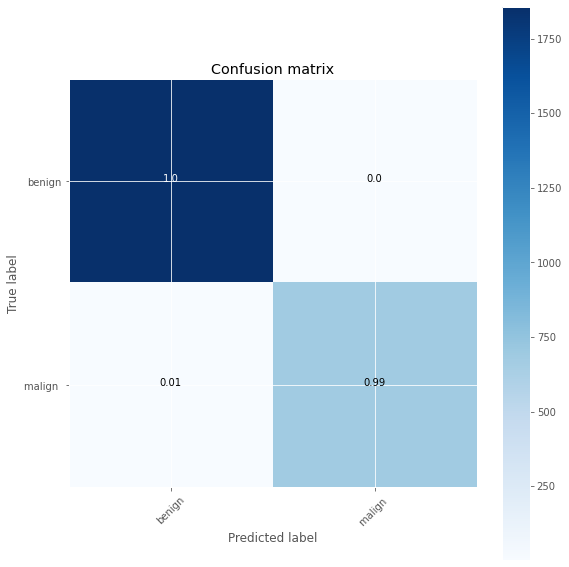

In [ ]:
classifierRF=RandomForestClassifier(n_estimators=25)
classifierRF=classifierRF.fit(X_train_z_score,y_train)

predictions=classifierRF.predict(X_test_z_score)

print('Accuracy  classifier on test set: {:.4f}'.format(classifierRF.score(X_test_z_score, y_test)))

y_pred=predictions
# confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
print(classification_report(y_test, y_pred, digits=4,target_names=['benign', 'malign']))

figure = plot_confusion_matrix(matrix, target_list)


## Cross-Validation Random Forest - Train


In [ ]:
from numpy import mean
from numpy import std
cross_val_dict_DT = {}
for key,value in dataset_feature_select.items():
    scores = cross_val_score(classifierRF, value, y_train, cv=skf)
    # report performance
    print('Dataset: ', key)
    print('Accuracy: %.4f (%.3f)' % (mean(scores), std(scores)))
    cross_val_dict_DT[key]= (mean(scores), std(scores))
cross_val_dict_DT

Dataset:  z_scaler_data
Accuracy: 0.9944 (0.002)
Dataset:  z_scaler_p_value
Accuracy: 0.9944 (0.001)
Dataset:  z_scaler_4_features
Accuracy: 0.9906 (0.002)
Dataset:  z_scaler_10_features
Accuracy: 0.9943 (0.002)
Dataset:  X_train_fs_z_scaler
Accuracy: 0.9947 (0.001)


{'z_scaler_data': (0.9943811394891944, 0.001503171651346836),
 'z_scaler_p_value': (0.9944204322200393, 0.0014759638484080964),
 'z_scaler_4_features': (0.990648330058939, 0.001765332798761118),
 'z_scaler_10_features': (0.9942829076620825, 0.0015648178979756294),
 'X_train_fs_z_scaler': (0.9946758349705305, 0.0013939231257419848)}

## Random Forest Models for different features numbers

### Random Forest Model with p-value anova dataset

Accuracy  classifier on test set: 0.9953
[[1855    4]
 [   8  679]]
              precision    recall  f1-score   support

      benign     0.9957    0.9978    0.9968      1859
      malign     0.9941    0.9884    0.9912       687

    accuracy                         0.9953      2546
   macro avg     0.9949    0.9931    0.9940      2546
weighted avg     0.9953    0.9953    0.9953      2546



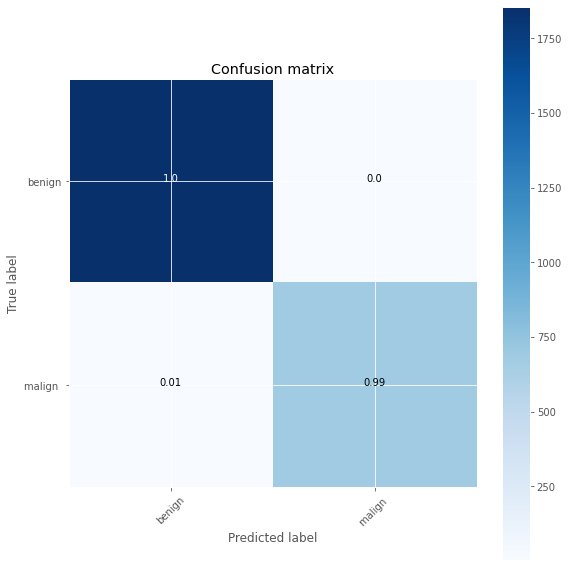

In [ ]:
classifierRF=RandomForestClassifier(n_estimators=25)
classifierRF.fit(X_train_pvalue_anova,y_train)
predictions=classifierRF.predict(X_test_pvalue_anova)
y_pred=predictions
print('Accuracy  classifier on test set: {:.4f}'.format(classifierRF.score(X_test_pvalue_anova, y_test)))
# confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
print(classification_report(y_test, y_pred, digits=4,target_names=['benign', 'malign']))
figure = plot_confusion_matrix(matrix, target_list)

### Random Forest Model with anova scores 4 features dataset

Accuracy  classifier on test set: 0.9894
[[1850    9]
 [  18  669]]
              precision    recall  f1-score   support

      benign     0.9904    0.9952    0.9928      1859
      malign     0.9867    0.9738    0.9802       687

    accuracy                         0.9894      2546
   macro avg     0.9885    0.9845    0.9865      2546
weighted avg     0.9894    0.9894    0.9894      2546



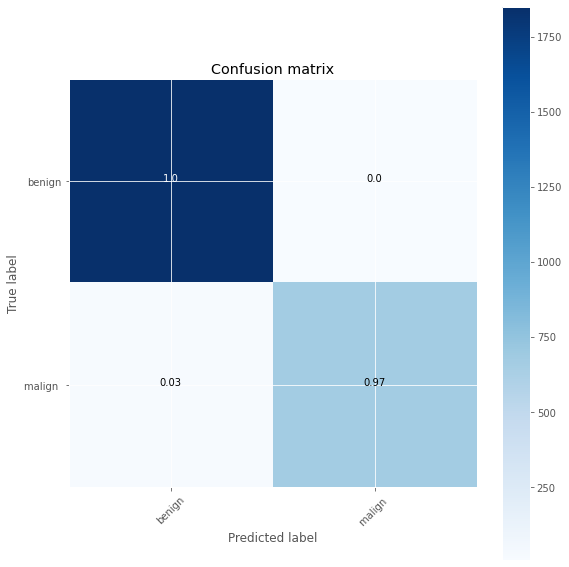

In [ ]:
classifierRF=RandomForestClassifier(n_estimators=25)
classifierRF.fit(X_train_4_f_anova,y_train)
predictions=classifierRF.predict(X_test_4_f_anova)
y_pred=predictions
print('Accuracy  classifier on test set: {:.4f}'.format(classifierRF.score(X_test_4_f_anova, y_test)))
# confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
print(classification_report(y_test, y_pred, digits=4,target_names=['benign', 'malign']))
figure = plot_confusion_matrix(matrix, target_list)

### Random Forest Model with anova scores 10 features dataset

Accuracy  classifier on test set: 0.9953
[[1855    4]
 [   8  679]]
              precision    recall  f1-score   support

      benign     0.9957    0.9978    0.9968      1859
      malign     0.9941    0.9884    0.9912       687

    accuracy                         0.9953      2546
   macro avg     0.9949    0.9931    0.9940      2546
weighted avg     0.9953    0.9953    0.9953      2546



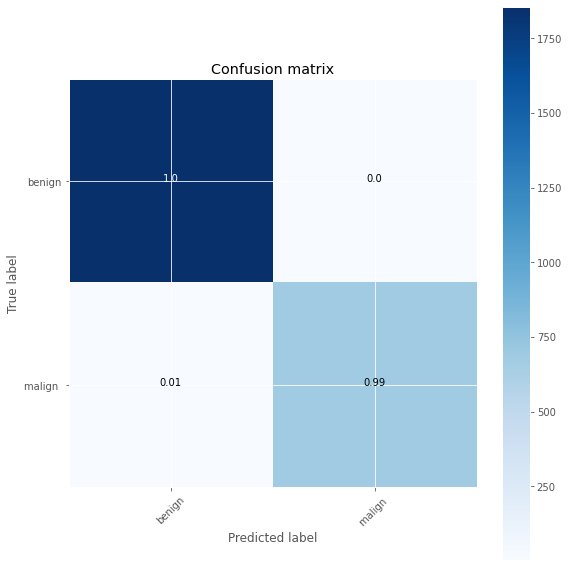

In [ ]:
classifierRF=RandomForestClassifier(n_estimators=25)
classifierRF.fit(X_train_10_f_anova,y_train)
predictions=classifierRF.predict(X_test_10_f_anova)
y_pred=predictions
print('Accuracy  classifier on test set: {:.4f}'.format(classifierRF.score(X_test_10_f_anova, y_test)))
# confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
print(classification_report(y_test, y_pred, digits=4,target_names=['benign', 'malign']))
figure = plot_confusion_matrix(matrix, target_list)

### Random Forest Model with RFECV wrapper (12) features dataset

Accuracy  classifier on test set: 0.9953
[[1855    4]
 [   8  679]]
              precision    recall  f1-score   support

      benign     0.9957    0.9978    0.9968      1859
      malign     0.9941    0.9884    0.9912       687

    accuracy                         0.9953      2546
   macro avg     0.9949    0.9931    0.9940      2546
weighted avg     0.9953    0.9953    0.9953      2546



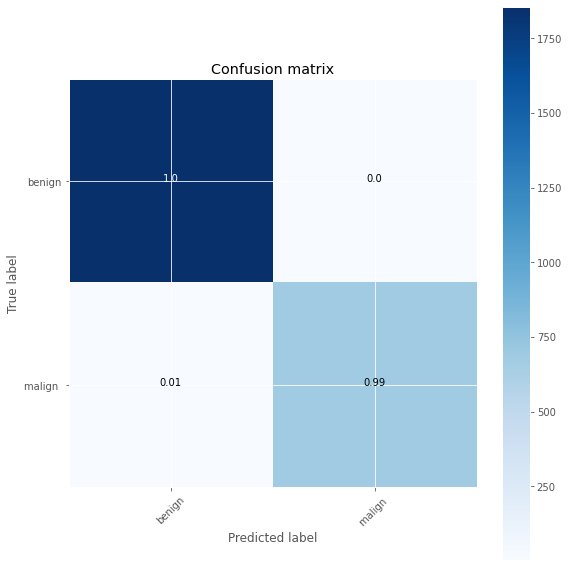

In [ ]:
classifierRF=RandomForestClassifier(n_estimators=25)
classifierRF.fit(X_train_fs_z_scaler,y_train)
predictions=classifierRF.predict(X_test_fs_z_scaler)
y_pred=predictions
print('Accuracy  classifier on test set: {:.4f}'.format(classifierRF.score(X_test_fs_z_scaler, y_test)))
# confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
print(classification_report(y_test, y_pred,digits=4, target_names=['benign', 'malign']))
figure = plot_confusion_matrix(matrix, target_list)

## Grid Search Hyperparameters RandomForest

In [ ]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(classifierRF, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train_z_score, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


# Decision Tree


##Decision Tree Basic Model

Profundidad del árbol: 5
Número de nodos terminales: 15


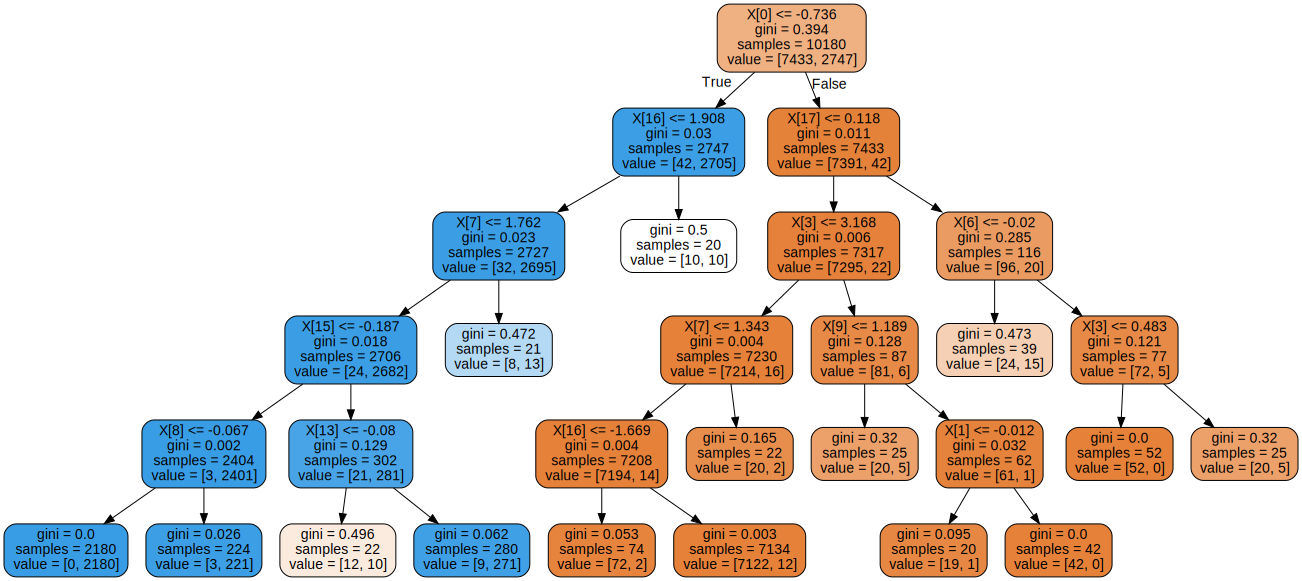

In [ ]:
from pandas.core.common import random_state
import graphviz

 

modelo_DTree = tree.DecisionTreeClassifier(
    criterion= "gini",
    #splitter= "best",
    max_depth=5,
    #min_samples_split= 10,
    min_samples_leaf=20,
    #min_weight_fraction_leaf=0.0,
    #max_features=None,
    random_state=12345,
    #max_leaf_nodes=None,
    #min_impurity_decrease=0.05,
    #class_weight=None,
    #ccp_alpha = 0.0    
)

modelo_DTree = modelo_DTree.fit(X_train_z_scaler, y_train)

print(f"Profundidad del árbol: {modelo_DTree.get_depth()}")
print(f"Número de nodos terminales: {modelo_DTree.get_n_leaves()}")

dot_data = tree.export_graphviz(modelo_DTree, out_file=None, filled=True,rounded=True) 
graph = graphviz.Source(dot_data) 
graph



-------------------

Accuracy  classifier on test set: 0.9902

 --------  classification_report  -----------

              precision    recall  f1-score   support

      benign     0.9904    0.9962    0.9933      1859
     malign      0.9896    0.9738    0.9817       687

    accuracy                         0.9902      2546
   macro avg     0.9900    0.9850    0.9875      2546
weighted avg     0.9902    0.9902    0.9902      2546

Matriz de confusión
-------------------
[[1852    7]
 [  18  669]]


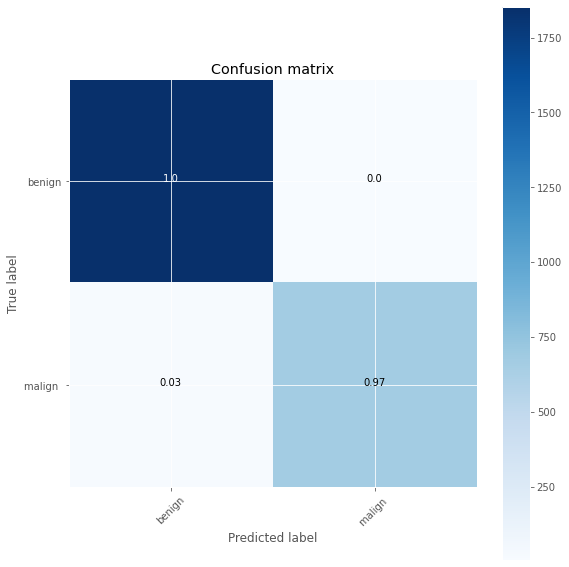

In [ ]:
y_pred = modelo_DTree.predict(X_test_z_scaler)

print("-------------------\n")

print('Accuracy  classifier on test set: {:.4f}'
      .format(accuracy_score(
            y_true    = y_test,
            y_pred    = y_pred,
            normalize = True
           )))
print("\n --------  classification_report  -----------\n")
print(classification_report(y_test, y_pred,digits=4,target_names = target_list))

print("Matriz de confusión")
print("-------------------")
matrix=confusion_matrix(y_test, y_pred)
print(matrix)
figure = plot_confusion_matrix(matrix, target_list)

##Cross-Validation Decision Tree -  Train

In [ ]:
cross_val_dict_DT = {}
for key,value in dataset_feature_select.items():
    scores = cross_val_score(modelo_DTree, value, y_train, cv=skf)
    # report performance
    print('Dataset: ', key)
    print('Accuracy: %.4f (%.3f)' % (mean(scores), std(scores)))
    cross_val_dict_DT[key]= (mean(scores), std(scores))
cross_val_dict_DT

Dataset:  z_scaler_data
Accuracy: 0.9914 (0.002)
Dataset:  z_scaler_p_value
Accuracy: 0.9921 (0.002)
Dataset:  z_scaler_4_features
Accuracy: 0.9910 (0.002)
Dataset:  z_scaler_10_features
Accuracy: 0.9910 (0.002)
Dataset:  X_train_fs_z_scaler
Accuracy: 0.9915 (0.002)


{'z_scaler_data': (0.991434184675835, 0.0018223526326609427),
 'z_scaler_p_value': (0.9921021611001966, 0.002269644186507205),
 'z_scaler_4_features': (0.9909823182711199, 0.0018265837798301576),
 'z_scaler_10_features': (0.9910216110019647, 0.0018921806094828457),
 'X_train_fs_z_scaler': (0.9915127701375246, 0.002039440357149081)}

##Decision Tree Models for different features numbers

###Decision Tree Model with p-value anova dataset

Profundidad del árbol: 5
Número de nodos terminales: 15
Accuracy  classifier on test set: 0.9918
-------------------


 --------  classification_report  -----------

              precision    recall  f1-score   support

      benign     0.9930    0.9957    0.9944      1859
      malign     0.9883    0.9811    0.9847       687

    accuracy                         0.9918      2546
   macro avg     0.9906    0.9884    0.9895      2546
weighted avg     0.9917    0.9918    0.9917      2546

Matriz de confusión
-------------------
[[1851    8]
 [  13  674]]


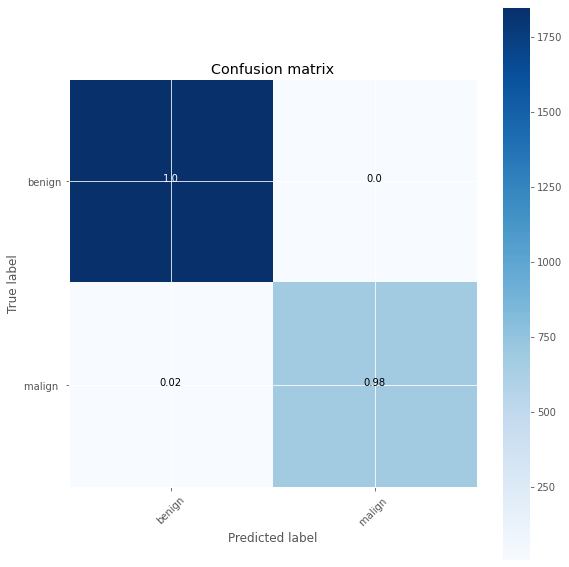

In [ ]:
modelo_DTree = modelo_DTree.fit(X_train_pvalue_anova, y_train)

print(f"Profundidad del árbol: {modelo_DTree.get_depth()}")
print(f"Número de nodos terminales: {modelo_DTree.get_n_leaves()}")

#-------------------------------------------------------------------------------
y_pred = modelo_DTree.predict(X_test_pvalue_anova)

print('Accuracy  classifier on test set: {:.4f}'.format(modelo_DTree.score(X_test_pvalue_anova, y_test)))

print("-------------------\n")

print("\n --------  classification_report  -----------\n")
print(classification_report(y_test, y_pred,digits=4,target_names=['benign', 'malign']))

print("Matriz de confusión")
print("-------------------")

matrix=confusion_matrix(y_test, y_pred)
print(matrix)
figure = plot_confusion_matrix(matrix, target_list)


###Decision Tree Model with anova scores 4 features dataset

Profundidad del árbol: 5
Número de nodos terminales: 19
Accuracy  classifier on test set: 0.9906
Matriz de confusión
-------------------
[[1849   10]
 [  14  673]]
-------------------


 --------  classification_report  -----------

              precision    recall  f1-score   support

      benign     0.9925    0.9946    0.9936      1859
      malign     0.9854    0.9796    0.9825       687

    accuracy                         0.9906      2546
   macro avg     0.9889    0.9871    0.9880      2546
weighted avg     0.9906    0.9906    0.9906      2546



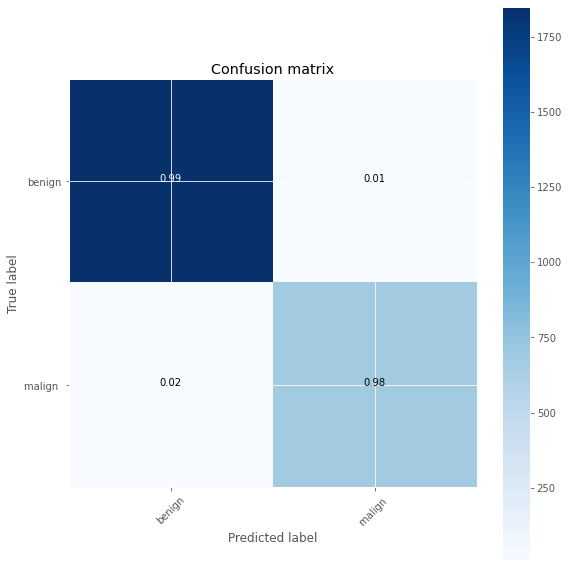

In [ ]:
modelo_DTree = modelo_DTree.fit(X_train_4_f_anova, y_train)

print(f"Profundidad del árbol: {modelo_DTree.get_depth()}")
print(f"Número de nodos terminales: {modelo_DTree.get_n_leaves()}")

#-------------------------------------------------------------------------------
y_pred = modelo_DTree.predict(X_test_4_f_anova)
print('Accuracy  classifier on test set: {:.4f}'.format(modelo_DTree.score(X_test_4_f_anova, y_test)))

print("Matriz de confusión")
print("-------------------")
matrix=confusion_matrix(y_test, y_pred)
print(matrix)
figure = plot_confusion_matrix(matrix, target_list)


print("-------------------\n")

print("\n --------  classification_report  -----------\n")
print(classification_report(y_test, y_pred,digits=4,target_names=['benign', 'malign']))

###Decision Tree Model with anova scores 10 features dataset

Profundidad del árbol: 5
Número de nodos terminales: 16
Accuracy  classifier on test set: 0.9906
Matriz de confusión
-------------------
[[1845   14]
 [  10  677]]
-------------------


 --------  classification_report  -----------

              precision    recall  f1-score   support

      benign     0.9946    0.9925    0.9935      1859
      malign     0.9797    0.9854    0.9826       687

    accuracy                         0.9906      2546
   macro avg     0.9872    0.9890    0.9881      2546
weighted avg     0.9906    0.9906    0.9906      2546



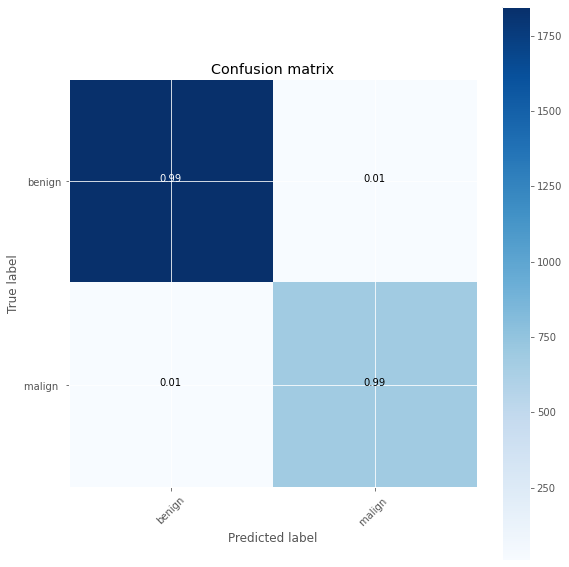

In [ ]:
modelo_DTree = modelo_DTree.fit(X_train_10_f_anova, y_train)

print(f"Profundidad del árbol: {modelo_DTree.get_depth()}")
print(f"Número de nodos terminales: {modelo_DTree.get_n_leaves()}")

#-------------------------------------------------------------------------------
y_pred = modelo_DTree.predict(X_test_10_f_anova)
print('Accuracy  classifier on test set: {:.4f}'.format(modelo_DTree.score(X_test_10_f_anova, y_test)))

print("Matriz de confusión")
print("-------------------")
matrix=confusion_matrix(y_test, y_pred)
print(matrix)
figure = plot_confusion_matrix(matrix, target_list)

print("-------------------\n")

print("\n --------  classification_report  -----------\n")
print(classification_report(y_test, y_pred,digits=4,target_names=['benign', 'malign']))

###Decision Tree Model with RFECV wrapper (12) features dataset

Profundidad del árbol: 5
Número de nodos terminales: 16
Accuracy  classifier on test set: 0.9918
Matriz de confusión
-------------------
[[1851    8]
 [  13  674]]
-------------------


 --------  classification_report  -----------

              precision    recall  f1-score   support

      benign     0.9930    0.9957    0.9944      1859
      malign     0.9883    0.9811    0.9847       687

    accuracy                         0.9918      2546
   macro avg     0.9906    0.9884    0.9895      2546
weighted avg     0.9917    0.9918    0.9917      2546



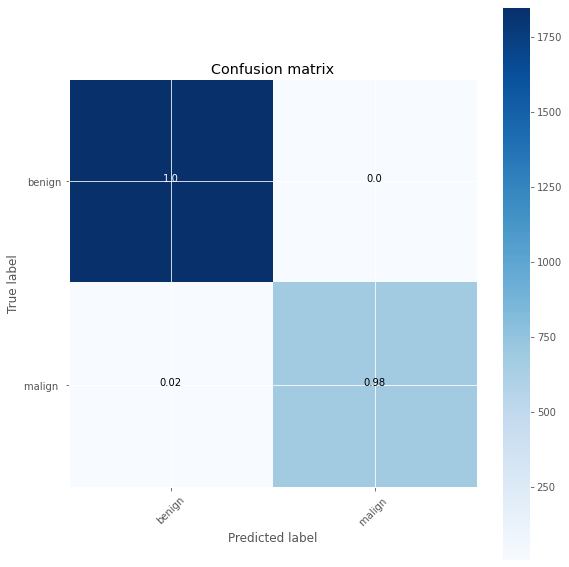

In [ ]:
modelo_DTree = modelo_DTree.fit(X_train_fs_z_scaler, y_train)

print(f"Profundidad del árbol: {modelo_DTree.get_depth()}")
print(f"Número de nodos terminales: {modelo_DTree.get_n_leaves()}")

#-------------------------------------------------------------------------------
y_pred = modelo_DTree.predict(X_test_fs_z_scaler)
print('Accuracy  classifier on test set: {:.4f}'.format(modelo_DTree.score(X_test_fs_z_scaler, y_test)))

print("Matriz de confusión")
print("-------------------")
matrix=confusion_matrix(y_test, y_pred)
print(matrix)
figure = plot_confusion_matrix(matrix, target_list)

print("-------------------\n")

print("\n --------  classification_report  -----------\n")
print(classification_report(y_test, y_pred,digits=4,target_names=['benign', 'malign']))

## Grid Search Decision Tree - Podado del árbol

In [ ]:
#Podado del árbol (pruning): Con el objetivo de identificar la profundidad óptima que consigue reducir 
#la varianza y aumentar la capacidad predictiva del modelo, se somete al árbol a un proceso de pruning.


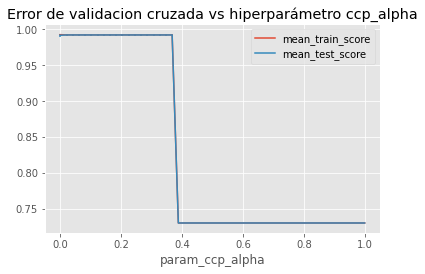

In [ ]:
from sklearn.model_selection import GridSearchCV
# Post pruning (const complexity pruning) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0,1 , 50)} #0 5 10

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible antes de aplicar el pruning
        estimator = tree.DecisionTreeClassifier(
                            criterion="gini",
                            max_depth         = None,
                            min_samples_leaf  = 20, # 5-10
                            random_state      = 12345
                       ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train_z_scaler, y_train)

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

[texto del enlace](https://)# New Section

In [ ]:
# Mejor valor ccp_alpha encontrado
# ------------------------------------------------------------------------------
grid.best_params_


{'ccp_alpha': 0.02040816326530612}

In [ ]:
#Una vez identificado el valor óptimo de ccp_alpha, se reentrena el árbol 
#indicando este valor en sus argumentos. Si en el GridSearchCV() se indica refit=True,
# este reentrenamiento se hace automáticamente y el modelo resultante se encuentra almacenado en .best_estimator_.

Profundidad del árbol: 1
Número de nodos terminales: 2


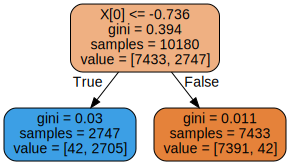

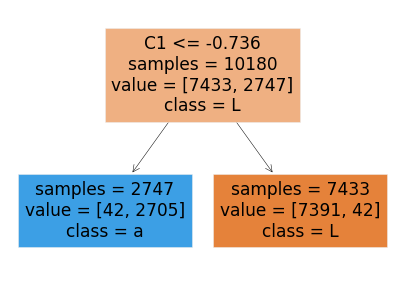

In [ ]:
from sklearn.tree import plot_tree
# Estructura del árbol final
# ------------------------------------------------------------------------------
modelo_final = grid.best_estimator_
print(f"Profundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

fig, ax = plt.subplots(figsize=(7, 5))
plot = plot_tree(
            decision_tree = modelo_final,
            feature_names = dfData.drop(columns = "Label").columns,
            class_names   = 'Label',
            filled        = True,
            impurity      = False,
            ax            = ax
       )

dot_data = tree.export_graphviz(modelo_final, out_file=None, filled=True,rounded=True) 
graph = graphviz.Source(dot_data) 
graph

Evaluacion modelo final - Decision Tree

In [ ]:
from sklearn.metrics import accuracy_score
#-------------------------------------------------------------------------------
y_pred = modelo_final.predict(X_test_z_scaler)

print("Matriz de confusión")
print("-------------------")
print(confusion_matrix(y_test, y_pred))


print("-------------------\n")

print('Accuracy  classifier on test set: {:.3f}'
      .format(accuracy_score(
            y_true    = y_test,
            y_pred    = y_pred,
            normalize = True
           )))
print("\n --------  classification_report  -----------\n")
print(classification_report(y_test, y_pred))

Matriz de confusión
-------------------
[[1848   11]
 [  10  677]]
-------------------

Accuracy  classifier on test set: 0.992

 --------  classification_report  -----------

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1859
           1       0.98      0.99      0.98       687

    accuracy                           0.99      2546
   macro avg       0.99      0.99      0.99      2546
weighted avg       0.99      0.99      0.99      2546



# Gradient Boosting Classifier

##Gradient Boosting Classifier Basic model

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Accuracy  classifier on test set: 0.9937
Matriz de confusión
-------------------
[[1851    8]
 [   8  679]]
-------------------


 --------  classification_report  -----------

              precision    recall  f1-score   support

           0     0.9957    0.9957    0.9957      1859
           1     0.9884    0.9884    0.9884       687

    accuracy                         0.9937      2546
   macro avg     0.9920    0.9920    0.9920      2546
weighted avg     0.9937    0.9937    0.9937      2546



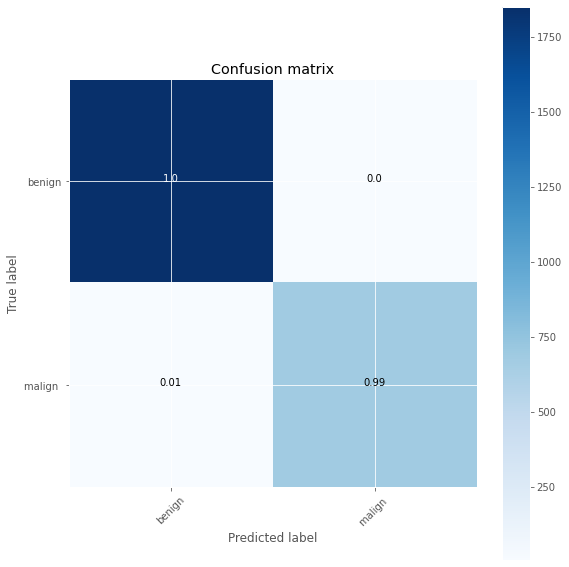

In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train_z_score, y_train)

y_pred = gb_clf.predict(X_test_z_scaler)
print('Accuracy  classifier on test set: {:.4f}'.format(gb_clf.score(X_test_z_scaler, y_test)))

print("Matriz de confusión")
print("-------------------")
matrix= confusion_matrix(y_test, y_pred) 
print(matrix)
figure = plot_confusion_matrix(matrix, target_list)


print("-------------------\n")
print("\n --------  classification_report  -----------\n")
print(classification_report(y_test, y_pred, digits=4))

## Cross-Validation Gradient Boosting Classifier - Train

In [ ]:
cross_val_dict_DT = {}
for key,value in dataset_feature_select.items():
    scores = cross_val_score(gb_clf, value, y_train, cv=skf)
    # report performance
    print('Dataset: ', key)
    print('Accuracy: %.4f (%.3f)' % (mean(scores), std(scores)))
    cross_val_dict_DT[key]= (mean(scores), std(scores))
cross_val_dict_DT

Dataset:  z_scaler_data
Accuracy: 0.9926 (0.002)
Dataset:  z_scaler_p_value
Accuracy: 0.9920 (0.002)
Dataset:  z_scaler_4_features
Accuracy: 0.9905 (0.002)
Dataset:  z_scaler_10_features
Accuracy: 0.9919 (0.002)
Dataset:  X_train_fs_z_scaler
Accuracy: 0.9932 (0.002)


{'z_scaler_data': (0.992573673870334, 0.0018446671268063676),
 'z_scaler_p_value': (0.9919646365422398, 0.0019933074944299793),
 'z_scaler_4_features': (0.9904911591355601, 0.0022864183144952737),
 'z_scaler_10_features': (0.9919449901768174, 0.00203697852193789),
 'X_train_fs_z_scaler': (0.9931827111984284, 0.001639736079753662)}

## Gradient Boosting Classifier Models for different features numbers

### Gradient Boosting Model with p-value anova dataset

Accuracy  classifier on test set: 0.9929
Matriz de confusión
-------------------
[[1850    9]
 [   9  678]]
-------------------


 --------  classification_report  -----------

              precision    recall  f1-score   support

           0     0.9952    0.9952    0.9952      1859
           1     0.9869    0.9869    0.9869       687

    accuracy                         0.9929      2546
   macro avg     0.9910    0.9910    0.9910      2546
weighted avg     0.9929    0.9929    0.9929      2546



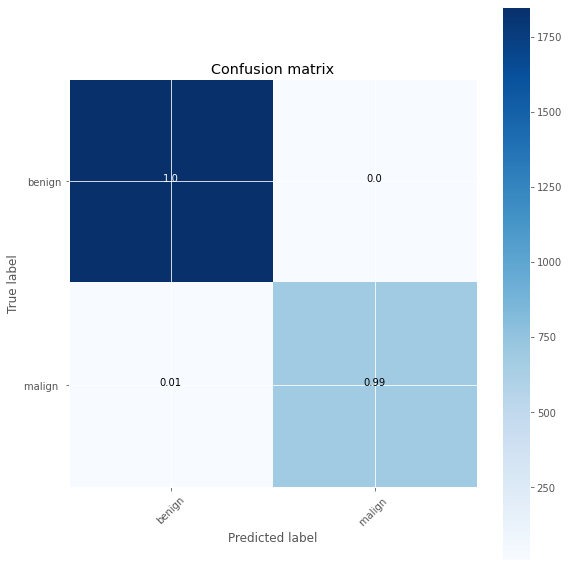

In [ ]:
gb_clf.fit(X_train_pvalue_anova, y_train)
y_pred = gb_clf.predict(X_test_pvalue_anova)

print('Accuracy  classifier on test set: {:.4f}'.format(gb_clf.score(X_test_pvalue_anova, y_test)))

print("Matriz de confusión")
print("-------------------")
matrix= confusion_matrix(y_test, y_pred) 
print(matrix)
figure = plot_confusion_matrix(matrix, target_list)


print("-------------------\n")
print("\n --------  classification_report  -----------\n")
print(classification_report(y_test, y_pred, digits=4))

### Gradient Boosting Model with anova scores 4 features dataset

Accuracy  classifier on test set: 0.9910
Matriz de confusión
-------------------
[[1848   11]
 [  12  675]]
-------------------


 --------  classification_report  -----------

              precision    recall  f1-score   support

           0     0.9935    0.9941    0.9938      1859
           1     0.9840    0.9825    0.9832       687

    accuracy                         0.9910      2546
   macro avg     0.9888    0.9883    0.9885      2546
weighted avg     0.9910    0.9910    0.9910      2546



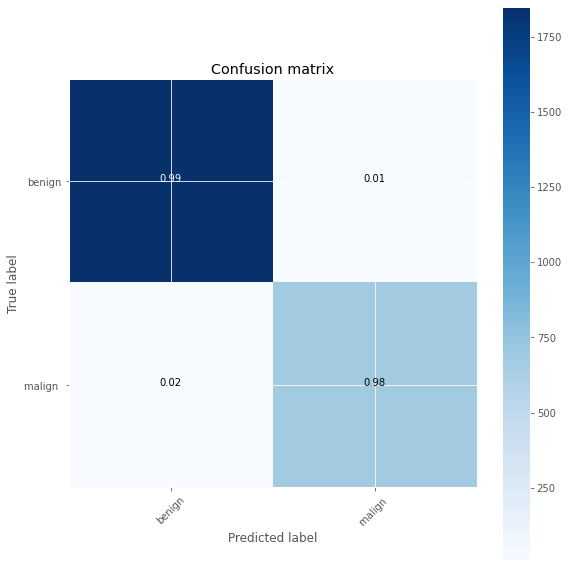

In [ ]:
gb_clf.fit(X_train_4_f_anova, y_train)

y_pred = gb_clf.predict(X_test_4_f_anova)
print('Accuracy  classifier on test set: {:.4f}'.format(gb_clf.score(X_test_4_f_anova, y_test)))

print("Matriz de confusión")
print("-------------------")
matrix= confusion_matrix(y_test, y_pred) 
print(matrix)
figure = plot_confusion_matrix(matrix, target_list)


print("-------------------\n")
print("\n --------  classification_report  -----------\n")
print(classification_report(y_test, y_pred, digits=4))

### Gradient Boosting Model with anova scores 10 features dataset

Accuracy  classifier on test set: 0.9925
Matriz de confusión
-------------------
[[1850    9]
 [  10  677]]
-------------------


 --------  classification_report  -----------

              precision    recall  f1-score   support

           0     0.9946    0.9952    0.9949      1859
           1     0.9869    0.9854    0.9862       687

    accuracy                         0.9925      2546
   macro avg     0.9908    0.9903    0.9905      2546
weighted avg     0.9925    0.9925    0.9925      2546



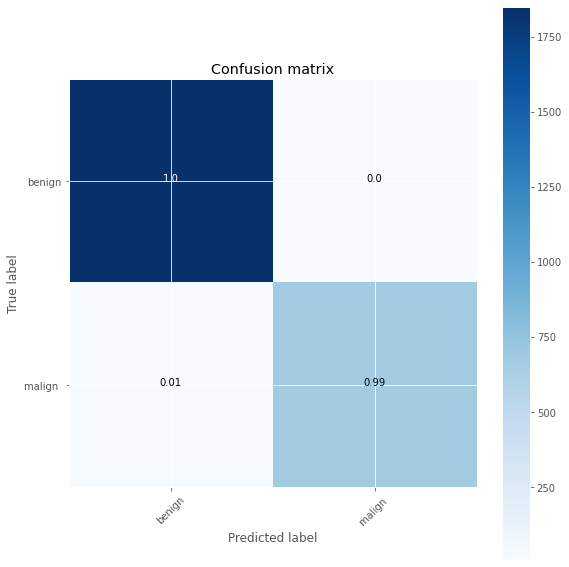

In [ ]:
gb_clf.fit(X_train_10_f_anova, y_train)

y_pred = gb_clf.predict(X_test_10_f_anova)
print('Accuracy  classifier on test set: {:.4f}'.format(gb_clf.score(X_test_10_f_anova, y_test)))

print("Matriz de confusión")
print("-------------------")
matrix= confusion_matrix(y_test, y_pred) 
print(matrix)
figure = plot_confusion_matrix(matrix, target_list)


print("-------------------\n")
print("\n --------  classification_report  -----------\n")
print(classification_report(y_test, y_pred, digits=4))

### Gradient Boosting Model with RFECV wrapper features dataset


Accuracy  classifier on test set: 0.9929
Matriz de confusión
-------------------
[[1851    8]
 [  10  677]]
-------------------


 --------  classification_report  -----------

              precision    recall  f1-score   support

           0     0.9946    0.9957    0.9952      1859
           1     0.9883    0.9854    0.9869       687

    accuracy                         0.9929      2546
   macro avg     0.9915    0.9906    0.9910      2546
weighted avg     0.9929    0.9929    0.9929      2546



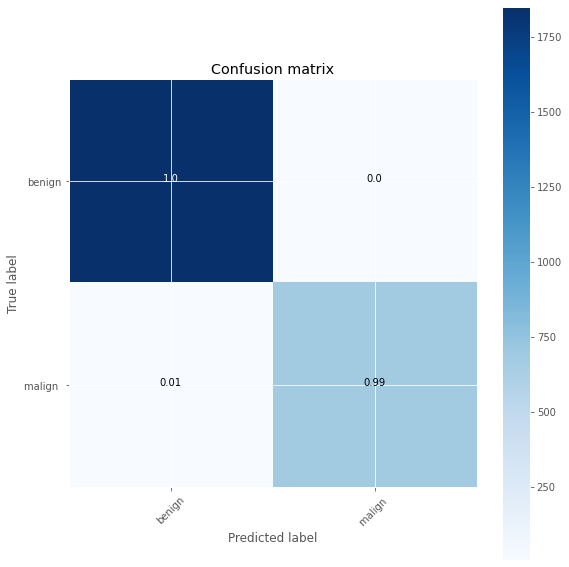

In [ ]:
gb_clf.fit(X_train_fs_z_scaler, y_train)

y_pred = gb_clf.predict(X_test_fs_z_scaler)
print('Accuracy  classifier on test set: {:.4f}'.format(gb_clf.score(X_test_fs_z_scaler, y_test)))

print("Matriz de confusión")
print("-------------------")
matrix= confusion_matrix(y_test, y_pred) 
print(matrix)
figure = plot_confusion_matrix(matrix, target_list)


print("-------------------\n")
print("\n --------  classification_report  -----------\n")
print(classification_report(y_test, y_pred, digits=4))

##Grid Search Hyperparameters Gradient Boosting Classifier

In [ ]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train_z_score, y_train)
    

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train_z_score, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test_z_score, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.984
Accuracy score (validation): 0.980
Learning rate:  0.075
Accuracy score (training): 0.992
Accuracy score (validation): 0.992
Learning rate:  0.1
Accuracy score (training): 0.991
Accuracy score (validation): 0.992
Learning rate:  0.25
Accuracy score (training): 0.992
Accuracy score (validation): 0.992
Learning rate:  0.5
Accuracy score (training): 0.994
Accuracy score (validation): 0.994
Learning rate:  0.75
Accuracy score (training): 0.995
Accuracy score (validation): 0.994
Learning rate:  1
Accuracy score (training): 0.997
Accuracy score (validation): 0.995


In [ ]:
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(gbc,parameters,cv=5)
cv.fit(X_train_z_score, y_train)

KeyboardInterrupt: ignored

In [ ]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

display(cv)

# knn

##knn basic model

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Accuracy  classifier on test set: 0.9906
-------------------


 --------  classification_report  -----------

              precision    recall  f1-score   support

           0     0.9904    0.9968    0.9936      1859
           1     0.9911    0.9738    0.9824       687

    accuracy                         0.9906      2546
   macro avg     0.9907    0.9853    0.9880      2546
weighted avg     0.9906    0.9906    0.9905      2546

Matriz de confusión
-------------------
[[1853    6]
 [  18  669]]


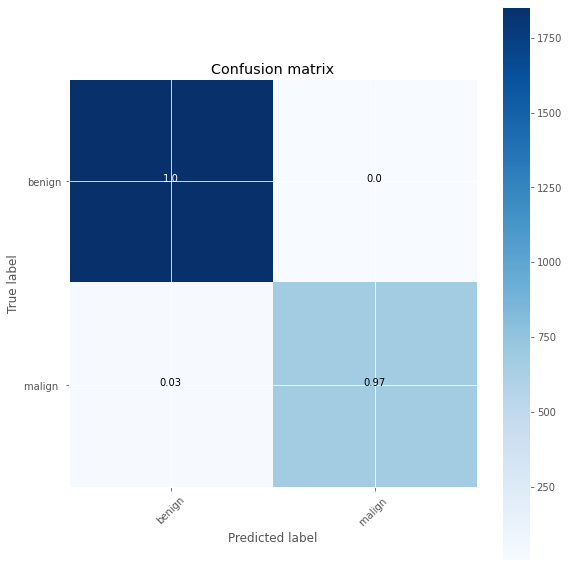

In [ ]:
classifier_Knn = KNeighborsClassifier(n_neighbors = 36, p = 1) #p1= manhattan_distance  / p2=euclidean_distance 

classifier_Knn.fit(X_train_z_score, y_train)
y_pred = classifier_Knn.predict(X_test_z_scaler)

print('Accuracy  classifier on test set: {:.4f}'.format(classifier_Knn.score(X_test_z_scaler, y_test)))

print("-------------------\n")
print("\n --------  classification_report  -----------\n")
print(classification_report(y_test, y_pred, digits=4))

print("Matriz de confusión")
print("-------------------")
matrix=confusion_matrix(y_test, y_pred)
print(matrix)
figure = plot_confusion_matrix(matrix, target_list)

In [ ]:
669/(669+6) # precision c11 /(c01+c11)  = precision (1) proporcion de positivos verdaderos clasificados correctamente 

#669/(18+669) # recall  c11 / (c10+c11) = recall (1) proporcion de casos clasificados correctamente (es decir los que son malignos)


0.9737991266375546

##Cross-Validation knn - train

In [ ]:
cross_val_dict_DT = {}
for key,value in dataset_feature_select.items():
    scores = cross_val_score(classifier_Knn, value, y_train, cv=skf)
    print("value.shape", value.shape)
    # report performance
    print('Dataset: ', key)
    print('Accuracy: %.4f (%.3f)' % (mean(scores), std(scores)))
    cross_val_dict_DT[key]= (mean(scores), std(scores))
cross_val_dict_DT

value.shape (10180, 18)
Dataset:  z_scaler_data
Accuracy: 0.9878 (0.002)
value.shape (10180, 15)
Dataset:  z_scaler_p_value
Accuracy: 0.9878 (0.002)
value.shape (10180, 4)
Dataset:  z_scaler_4_features
Accuracy: 0.9913 (0.002)
value.shape (10180, 10)
Dataset:  z_scaler_10_features
Accuracy: 0.9891 (0.002)
value.shape (10180, 12)
Dataset:  X_train_fs_z_scaler
Accuracy: 0.9889 (0.002)


{'z_scaler_data': (0.9877603143418467, 0.001873731869165645),
 'z_scaler_p_value': (0.9877799607072691, 0.0020002663082452467),
 'z_scaler_4_features': (0.9913163064833006, 0.0021192591843083477),
 'z_scaler_10_features': (0.9891355599214146, 0.0019013378525634913),
 'X_train_fs_z_scaler': (0.9888801571709233, 0.0019293491076135137)}

##knn Models for different features numbers

### knn model with p-value anova dataset

Accuracy  classifier on test set: 0.9906
-------------------


 --------  classification_report  -----------

              precision    recall  f1-score   support

           0     0.9909    0.9962    0.9936      1859
           1     0.9897    0.9753    0.9824       687

    accuracy                         0.9906      2546
   macro avg     0.9903    0.9857    0.9880      2546
weighted avg     0.9906    0.9906    0.9906      2546

Matriz de confusión
-------------------
[[1852    7]
 [  17  670]]


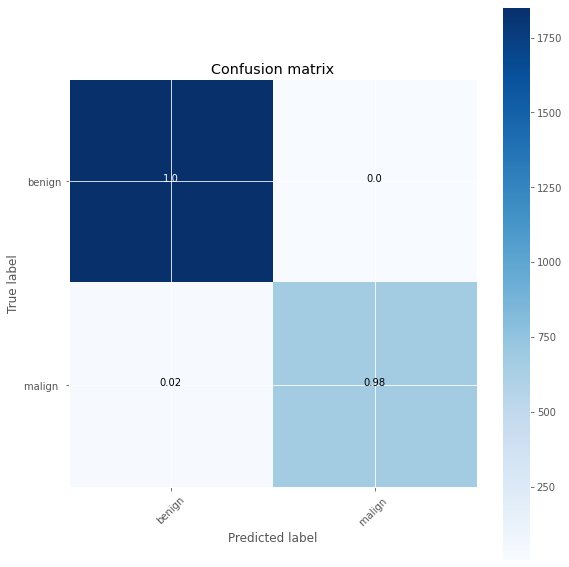

In [ ]:
from unicodedata import digit
classifier_Knn = KNeighborsClassifier(n_neighbors = 36, p = 1) #p1= manhattan_distance  / p2=euclidean_distance 

classifier_Knn.fit(X_train_pvalue_anova, y_train)
y_pred = classifier_Knn.predict(X_test_pvalue_anova)

print('Accuracy  classifier on test set: {:.4f}'.format(classifier_Knn.score(X_test_pvalue_anova, y_test)))

print("-------------------\n")
print("\n --------  classification_report  -----------\n")
print(classification_report(y_test, y_pred, digits=4))

print("Matriz de confusión")
print("-------------------")
matrix=confusion_matrix(y_test, y_pred)
print(matrix)
figure = plot_confusion_matrix(matrix, target_list )

 #show_absolute=True,
 #                               show_normed=True,

### knn model with anova scores 4 features dataset

Accuracy  classifier on test set: 0.9921
-------------------


 --------  classification_report  -----------

              precision    recall  f1-score   support

           0     0.9946    0.9946    0.9946      1859
           1     0.9854    0.9854    0.9854       687

    accuracy                         0.9921      2546
   macro avg     0.9900    0.9900    0.9900      2546
weighted avg     0.9921    0.9921    0.9921      2546

Matriz de confusión
-------------------
[[1849   10]
 [  10  677]]


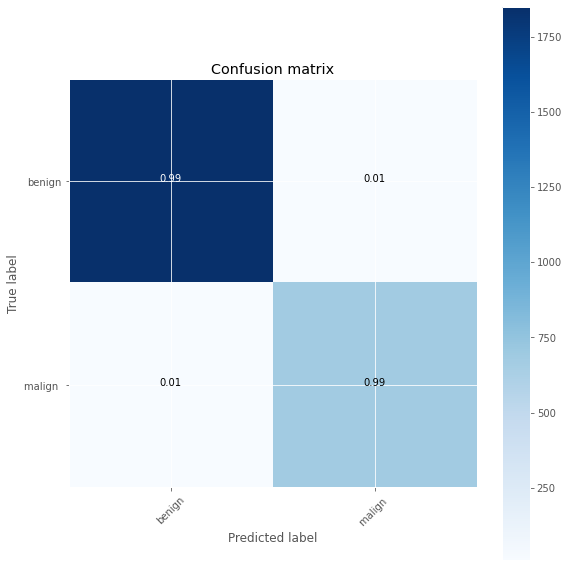

In [ ]:
classifier_Knn = KNeighborsClassifier(n_neighbors = 36, p = 1) #p1= manhattan_distance  / p2=euclidean_distance 

classifier_Knn.fit(X_train_4_f_anova, y_train)
y_pred = classifier_Knn.predict(X_test_4_f_anova)

print('Accuracy  classifier on test set: {:.4f}'.format(classifier_Knn.score(X_test_4_f_anova, y_test)))

print("-------------------\n")
print("\n --------  classification_report  -----------\n")
print(classification_report(y_test, y_pred, digits=4))

print("Matriz de confusión")
print("-------------------")
matrix=confusion_matrix(y_test, y_pred)
print(matrix)
figure = plot_confusion_matrix(matrix, target_list)

### knn model with anova scores 10 features dataset

Accuracy  classifier on test set: 0.9894
-------------------


 --------  classification_report  -----------

              precision    recall  f1-score   support

           0     0.9909    0.9946    0.9928      1859
           1     0.9853    0.9753    0.9802       687

    accuracy                         0.9894      2546
   macro avg     0.9881    0.9849    0.9865      2546
weighted avg     0.9894    0.9894    0.9894      2546

Matriz de confusión
-------------------
[[1849   10]
 [  17  670]]


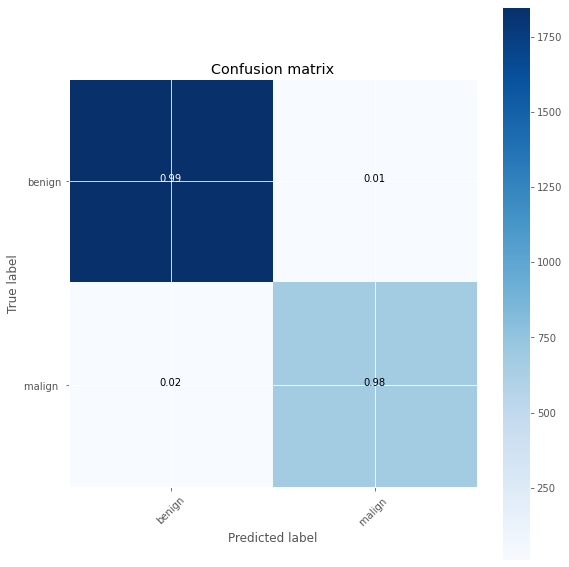

In [ ]:
classifier_Knn = KNeighborsClassifier(n_neighbors = 36, p = 1) #p1= manhattan_distance  / p2=euclidean_distance 

classifier_Knn.fit(X_train_10_f_anova, y_train)
y_pred = classifier_Knn.predict(X_test_10_f_anova)
print('Accuracy  classifier on test set: {:.4f}'.format(classifier_Knn.score(X_test_10_f_anova, y_test)))

print("-------------------\n")
print("\n --------  classification_report  -----------\n")
print(classification_report(y_test, y_pred, digits=4))

print("Matriz de confusión")
print("-------------------")
matrix=confusion_matrix(y_test, y_pred)
print(matrix)
figure = plot_confusion_matrix(matrix, target_list)

###knn model with RFECV wrapper features dataset

Accuracy  classifier on test set: 0.9902
-------------------


 --------  classification_report  -----------

              precision    recall  f1-score   support

           0     0.9920    0.9946    0.9933      1859
           1     0.9853    0.9782    0.9817       687

    accuracy                         0.9902      2546
   macro avg     0.9886    0.9864    0.9875      2546
weighted avg     0.9902    0.9902    0.9902      2546

Matriz de confusión
-------------------
[[1849   10]
 [  15  672]]


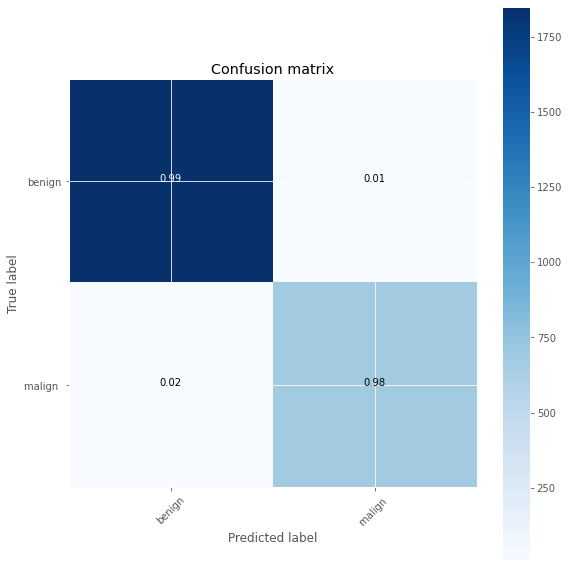

In [ ]:
classifier_Knn = KNeighborsClassifier(n_neighbors = 36, p = 1) #p1= manhattan_distance  / p2=euclidean_distance 

classifier_Knn.fit(X_train_fs_z_scaler, y_train)
y_pred = classifier_Knn.predict(X_test_fs_z_scaler)
print('Accuracy  classifier on test set: {:.4f}'.format(classifier_Knn.score(X_test_fs_z_scaler, y_test)))

print("-------------------\n")
print("\n --------  classification_report  -----------\n")
print(classification_report(y_test, y_pred, digits=4))

print("Matriz de confusión")
print("-------------------")
matrix=confusion_matrix(y_test, y_pred)
print(matrix)
figure = plot_confusion_matrix(matrix, target_list)

##Grid Search Knn

In [ ]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train_z_score, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 1


# Sparse Autoencoder + Deep dense Neural Network Model

In [ ]:
# Shapes
SAE_n_inputs=X_train.shape[1] #--- No. of neurons for the input and output layers
# SAE_n_hidden=16 #--- No. of neurons for the hidden layers (including bottleneck)
SAE_n_hidden = 14
SAE_n_outputs = 9
SAE_visible = Input(shape=(SAE_n_inputs,), name='SAE-Input-Layer') #--- Input-Layer

# Layers
#Encoder
#SAE_enc_hidden = Dense(units=SAE_n_inputs, activation='relu', name='SAE-Encoder-Hidden-Layer-EH1')(SAE_visible) #--- Encoder-Hidden-Layer
SAE_enc_hidden = Dense(units=SAE_n_hidden, activation='relu', name='SAE-Encoder-Hidden-Layer-EH2')(SAE_visible)
#--- Bottleneck-Layer
SAE_bottleneck = Dense(units=SAE_n_outputs, activation='relu', activity_regularizer=keras.regularizers.L1(0.0001), name='SAE-Bottleneck-Layer')(SAE_enc_hidden)
# Decoder
SAE_dec_hidden = Dense(units=SAE_n_hidden, activation='relu', name='SAE-Decoder-Hidden-Layer-DH2')(SAE_bottleneck) #--- Decoder-Hidden-Layer
SAE_output = Dense(units=SAE_n_inputs, activation='softmax', name='SAE-Output-Layer')(SAE_dec_hidden) #--- Output-Layer


In [ ]:

# Define Sparse autoencoder model
SAE_model = Model(inputs=SAE_visible, outputs=SAE_output, name='Sparse-Autoencoder-Model')

# Compile Sparse autoencoder model
SAE_model.compile(optimizer='adam', loss='mse')
#plot_model(SAE_model, 'autoencoder_no_compress.png', show_shapes=True)
# Print model summary
print(SAE_model.summary())

Model: "Sparse-Autoencoder-Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 SAE-Input-Layer (InputLayer  [(None, 18)]             0         
 )                                                               
                                                                 
 SAE-Encoder-Hidden-Layer-EH  (None, 14)               266       
 2 (Dense)                                                       
                                                                 
 SAE-Bottleneck-Layer (Dense  (None, 9)                135       
 )                                                               
                                                                 
 SAE-Decoder-Hidden-Layer-DH  (None, 14)               140       
 2 (Dense)                                                       
                                                                 
 SAE-Output-Layer (Dense)    (None, 18)   

In [ ]:
history = SAE_model.fit(X_train_z_scaler, X_train_z_scaler, epochs=100, batch_size=32, verbose=2, validation_split=0.2)

Epoch 1/100
255/255 - 2s - loss: 0.9795 - val_loss: 0.8218 - 2s/epoch - 10ms/step
Epoch 2/100
255/255 - 2s - loss: 0.9150 - val_loss: 0.7971 - 2s/epoch - 7ms/step
Epoch 3/100
255/255 - 1s - loss: 0.9041 - val_loss: 0.7925 - 616ms/epoch - 2ms/step
Epoch 4/100
255/255 - 1s - loss: 0.8993 - val_loss: 0.7877 - 689ms/epoch - 3ms/step
Epoch 5/100
255/255 - 1s - loss: 0.8937 - val_loss: 0.7819 - 587ms/epoch - 2ms/step
Epoch 6/100
255/255 - 1s - loss: 0.8898 - val_loss: 0.7802 - 633ms/epoch - 2ms/step
Epoch 7/100
255/255 - 1s - loss: 0.8888 - val_loss: 0.7794 - 678ms/epoch - 3ms/step
Epoch 8/100
255/255 - 1s - loss: 0.8869 - val_loss: 0.7719 - 655ms/epoch - 3ms/step
Epoch 9/100
255/255 - 1s - loss: 0.8853 - val_loss: 0.7702 - 652ms/epoch - 3ms/step
Epoch 10/100
255/255 - 1s - loss: 0.8847 - val_loss: 0.7693 - 689ms/epoch - 3ms/step
Epoch 11/100
255/255 - 1s - loss: 0.8845 - val_loss: 0.7695 - 669ms/epoch - 3ms/step
Epoch 12/100
255/255 - 1s - loss: 0.8843 - val_loss: 0.7691 - 647ms/epoch - 3ms

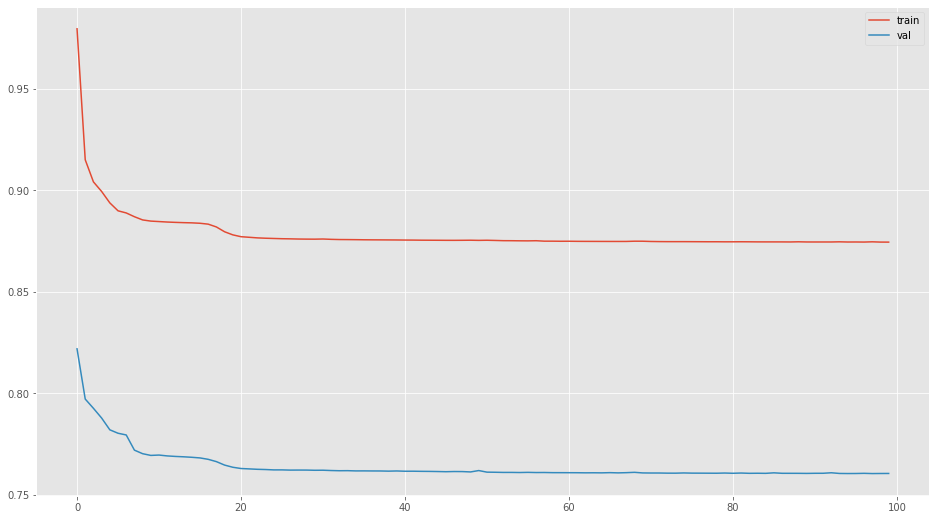

In [ ]:
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [ ]:
# define an encoder model (without the decoder)
#----------- Save SAE Encoder Model ----------#

# Define an encoder model without the decoder
SAE_encoder = Model(inputs=SAE_visible, outputs=SAE_bottleneck)

# Compile encoder model
SAE_encoder.compile(optimizer='adam', loss='mse')

# Save the encoder model to file
SAE_encoder.save('SAE_encoder.h5')


# encoderModel = Model(inputs=input_layer, outputs=bottleneck)
# plot_model(encoderModel, 'encoder_compress.png', show_shapes=True)
# # save the encoder to file
# encoderModel.save('encoderModel.h5')

In [ ]:

# load the model from file
encoder = load_model('SAE_encoder.h5')
# encode the train data
X_train_encode = encoder.predict(X_train_z_scaler)
# encode the test data
X_test_encode = encoder.predict(X_test_z_scaler)



80/80 [==============================] - 0s 2ms/step


In [ ]:
Y_predic = (SAE_model.predict(X_test_encode) > 0.5).astype(int)
Y_predic
conf_matrix = confusion_matrix(y_test, Y_predic)
print(conf_matrix)
print("\n --------  classification_report  -----------\n")
print(classification_report(y_test, Y_predic, digits=4))


ValueError: ignored

In [ ]:
Y_predic

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
#X_train_encode
X_train_encode

In [ ]:
X_test_encode

In [ ]:
 results = model_dnn.evaluate(X_test_encode, y_test,batch_size=32)

TypeError: ignored

In [ ]:
!pip install -U tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 8.5 MB/s 


In [ ]:
#from sklearn.model_selection import KFold as kfold

In [ ]:
#from tensorflow.keras import backend as K

In [ ]:
%%time
from keras.constraints import max_norm
from tensorflow.keras import backend as K
import tensorflow as tf
import tensorflow_addons as tfa
# import BatchNormalization
from keras.layers import BatchNormalization
import numpy as np
from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
## Define F1 measures: F1 = 2 * (precision * recall) / (precision + recall)

def custom_f1(y_true, y_pred):
    def recall_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Positives = K.sum(K.round(K.clip(y_true, 0, 1)))

        recall = TP / (Positives+K.epsilon())
        return recall


    def precision_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Pred_Positives = K.sum(K.round(K.clip(y_pred, 0, 1)))

        precision = TP / (Pred_Positives+K.epsilon())
        return precision

    precision, recall = precision_m(y_true, y_pred), recall_m(y_true, y_pred)

    return 2*((precision*recall)/(precision+recall+K.epsilon()))
# instantiate norm


norm = max_norm(5.0)
#############################################################################
model_dnn = Sequential()
model_dnn.add(Dense(120, input_dim=9, activation='relu',kernel_constraint=norm))
model_dnn.add(Dense(64, activation='relu'))
model_dnn.add(Dense(32, activation='relu'))
model_dnn.add(BatchNormalization())
model_dnn.add(Dense(1, activation="sigmoid"))
model_dnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', custom_f1, tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
##############################################################################
kFold = StratifiedKFold(n_splits=10,  random_state=12345, shuffle=True)
scores = np.zeros(10)
idx = 0

acc_per_fold = []
loss_per_fold = []
f1_per_fold = []
precision_per_fold  = []
recall_per_fold = []

def train_evaluate(model, x_train, y_train, x_val, y_val):
    with tf.device("/gpu:0"):
        history_Dnn = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data = (x_val, y_val))
        # print(history_Dnn.history)
        results = model.evaluate(x_val, y_val,batch_size=32)
        #results = dict(zip(model.metrics_names,results))
        print(results)
        acc_per_fold.append(results[1] * 100)
        f1_per_fold.append(results[2] * 100)
        precision_per_fold.append(results[3]* 100)
        recall_per_fold.append(results[4]* 100)
        loss_per_fold.append(results[0])


for  k_fold, (train, val) in enumerate(kfold.split(X=X_train_encode, y=y_train)):
    print('---- Starting fold %d ----'%(k_fold+1))
    train_evaluate(model_dnn, X_train_encode[train], y_train.values[train], X_train_encode[val], y_train.values[val])


In [ ]:
#Y_predic = (model_dnn.predict(X_test_encode) > 0.5).astype(int)
#Y_predic.shape
#y_test.shape
#print(classification_report(y_test, Y_predic, digits=4))

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000      1859
           1     0.2698    1.0000    0.4250       687

    accuracy                         0.2698      2546
   macro avg     0.1349    0.5000    0.2125      2546
weighted avg     0.0728    0.2698    0.1147      2546



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy', np.mean(acc_per_fold))
print('f1', np.mean(f1_per_fold))
print('precision', np.mean(precision_per_fold))
print('recall', np.mean(recall_per_fold))

NameError: ignored

In [ ]:
%%time

from keras.callbacks import TensorBoard, EarlyStopping
from datetime import datetime
logdir="/home/gass/cryptojacking/resultados/" + f'encoder_MLP' + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)
norm = max_norm(5.0)
#############################################################################
model_dnn = Sequential()
model_dnn.add(Dense(120, input_dim=9, activation='relu',kernel_constraint=norm))
model_dnn.add(Dense(64, activation='relu'))
model_dnn.add(Dense(32, activation='relu'))
model_dnn.add(BatchNormalization())
model_dnn.add(Dense(1, activation="sigmoid"))
model_dnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', custom_f1, tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
# model_dnn.add(Dense(2, activation="softmax"))
# model_dnn.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam',    metrics=['accuracy'])




NameError: ignored

In [ ]:
model_dnn.summary()

In [ ]:
%%time
with tf.device("/gpu:0"):
    history_Dnn = model_dnn.fit(X_train_encode, y_train, epochs=100, batch_size=32,
                                validation_data=(X_test_encode, y_test), callbacks=tensorboard_callback)

In [ ]:
y_train

In [ ]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard
%tensorboard --logdir /home/gass/cryptojacking/resultados

In [ ]:
pyplot.plot(history_Dnn.history['accuracy'], label='train')
pyplot.plot(history_Dnn.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()

In [ ]:
results = model_dnn.evaluate(X_test_encode, y_test)
results


In [ ]:
#Matriz de confusión con sigmoide
Y_predic = (model_dnn.predict(X_test_encode) > 0.5).astype(int)
print(classification_report(y_test,Y_predic, target_names=target_list))
cm_bin= confusion_matrix(y_test, Y_predic)
figure = plot_confusion_matrix(cm_bin, target_list)

In [ ]:
#matriz de confusión con softmax
test_predictions = np.argmax(model_dnn.predict(X_test_encode), axis=-1)
print(classification_report(y_test,test_predictions, target_names=target_list))
cm = confusion_matrix(y_test, test_predictions)
figure = plot_confusion_matrix(cm, target_list)

80/80 [==============================] - 0s 1ms/step


ValueError: ignored

In [ ]:
model_dnn.predict(X_test_encode)

80/80 [==============================] - 0s 2ms/step


array([[0.54884195],
       [0.54630226],
       [0.56933963],
       ...,
       [0.5506158 ],
       [0.53157544],
       [0.52619666]], dtype=float32)

In [ ]:
pyplot.plot(history_Dnn.history['loss'], label='train')
pyplot.plot(history_Dnn.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [ ]:
Y_predic = (model_dnn.predict(X_test_encode) > 0.5).astype(int)
Y_predic
conf_matrix = confusion_matrix(y_test, Y_predic)
print(conf_matrix)
print("\n --------  classification_report  -----------\n")
print(classification_report(y_test, Y_predic, digits=4))

80/80 [==============================] - 0s 2ms/step
[[   0 1859]
 [   0  687]]

 --------  classification_report  -----------

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000      1859
           1     0.2698    1.0000    0.4250       687

    accuracy                         0.2698      2546
   macro avg     0.1349    0.5000    0.2125      2546
weighted avg     0.0728    0.2698    0.1147      2546



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
np.random.seed(5) 
dim_entrada = X_train.shape[1]
input_layer = Input(shape=(dim_entrada,))
encoder = Dense(15, activation='tanh')(input_layer)
encoder = Dense(10, activation='relu')(encoder)
bottleneck = Dense(1, activation='relu')(encoder)
decoder = Dense(15, activation='tanh')(bottleneck)
decoder = Dense(18, activation='relu')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
sgd = SGD(lr=0.01)
autoencoder.compile(optimizer='sgd', loss='mse')
plot_model(autoencoder, 'autoencoder_no_compress.png', show_shapes=True)

history = autoencoder.fit(X_train, X_train, epochs=200, batch_size=32, verbose=2)#, validation_data=(X_test,X_test))

In [ ]:
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
X_train[0:10].shape

# ADVERSARIAL VALIDATION

In [ ]:
X_train_z_scaler_

,C1,C2,C3,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Percentage of processor usage
0,0.593762,1.337323,0.971614,-0.047431,0.020487,1.793153,0.005284,0.041601,0.024967,0.006288,-0.029410,-0.018757,-0.023729,0.002626,0.024627,0.071511,-1.786552,-0.593985
1,0.623460,-0.202564,-0.546913,-0.291533,6.236407,0.383953,5.034320,0.804169,-0.059784,-0.285139,-0.190155,-0.218131,-0.207514,-0.058287,-0.050035,0.677102,-1.848074,-0.624061
2,0.758108,1.578789,-0.225944,-0.488099,-0.230394,-0.144496,-0.314864,-0.052979,-0.071055,-0.293031,-0.190235,-0.226497,-0.209133,-0.080380,-0.050035,-0.509261,-1.866025,-0.758440
3,0.733687,0.552822,-0.437432,-0.499480,-0.232141,-0.496796,-0.314864,-0.234977,-0.071055,-0.281622,-0.190253,-0.220527,-0.209539,-0.080381,-0.050035,-0.414721,-1.886712,-0.734013
4,0.758475,0.828742,-0.004041,-0.500095,-0.232175,-0.496796,-0.314864,-0.171099,-0.071055,-0.276098,-0.190253,-0.216955,-0.209541,-0.082221,-0.050035,-0.509637,-1.895755,-0.758793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12721,0.714616,0.644851,-1.026375,-0.486257,-0.231908,-0.496796,-0.314864,-0.273089,-0.071055,-0.284440,-0.190297,-0.222917,-0.210752,-0.082221,-0.050035,-0.497352,0.996314,-0.714897
12722,0.580340,0.106462,-1.182509,-0.065968,0.033221,3.026202,0.022706,0.293863,-0.003422,0.278908,0.021090,0.226387,0.063149,-0.010414,-0.050035,1.006903,0.996689,-0.580693
12723,-1.353628,-0.818140,-0.458205,24.345201,8.011103,2.497752,15.956902,1.659928,1.029510,10.533813,4.182834,5.881287,5.040461,0.017650,-0.050035,11.010967,4.592847,1.348528
12724,-1.572753,-1.152943,-1.123911,16.536078,0.896347,0.383953,11.342607,0.690293,0.108396,3.955099,7.546009,2.789274,7.595708,-0.072895,-0.050035,19.422969,4.624805,1.574869


In [ ]:
X_train_z_scaler['target_AV'] = 0
X_test_z_scaler['target_AV'] = 1

X_train_z_scaler_AV = X_train_z_scaler.append(X_test_z_scaler)
y_train_AV = X_train_z_scaler_AV['target_AV']
X_train_z_scaler_AV = X_train_z_scaler_AV.drop(columns=['target_AV'])


In [ ]:
%%time
from sklearn.linear_model import LogisticRegression

estimator_lr = LogisticRegression(verbose=1, n_jobs=-1).fit(
    X_train_z_scaler_AV, y_train_AV)

print('Accuracy  classifier on training set: {:.3f}'.format(estimator_lr.score(X_train_z_scaler_AV, y_train_AV)))


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuracy  classifier on training set: 0.800
CPU times: user 49.7 ms, sys: 64.2 ms, total: 114 ms
Wall time: 1.46 s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.4s finished


In [ ]:
auc = roc_auc_score(y_test_gt_train, y_pred)
print('ROC AUC: %f' % auc)

NameError: ignored

# Varios


## Links Interes




*  https://towardsdatascience.com/optimizing-hyperparameters-in-random-forest-classification-ec7741f9d3f6

*   https://www.reneshbedre.com/blog/dbscan-python.html
* https://www.analyticsvidhya.com/blog/2021/01/a-quick-introduction-to-k-nearest-neighbor-knn-classification-using-python/


